# **Linear Regression (Only 3 inputs)**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats

In [3]:
file_path = '/kaggle/input/iitd-m-tech-smart-lathe-input/IITD M.Tech Smart Lathe Inputs/Experiment Summary.xlsx'  
data = pd.read_excel(file_path)

In [3]:
X = data.iloc[:, 1:4]  
y = data.iloc[:, 4]    

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [6]:
model.predict(np.array([[700,0.14,0.2]]))

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.16840808])

In [7]:
intercept = model.intercept_
coefficients = model.coef_
print(f'Equation of the hyperplane: Ra = {intercept:.4f} + {coefficients[0]:.4f} * Rpm + {coefficients[1]:.4f} * Feed + {coefficients[2]:.4f} * Depth')

Equation of the hyperplane: Ra = 3.0596 + -0.0035 * Rpm + 8.7140 * Feed + 1.6556 * Depth


In [8]:
r2 = r2_score(y_test, y_pred)
print(f'R² value: {r2}')

R² value: 0.7001669646953516


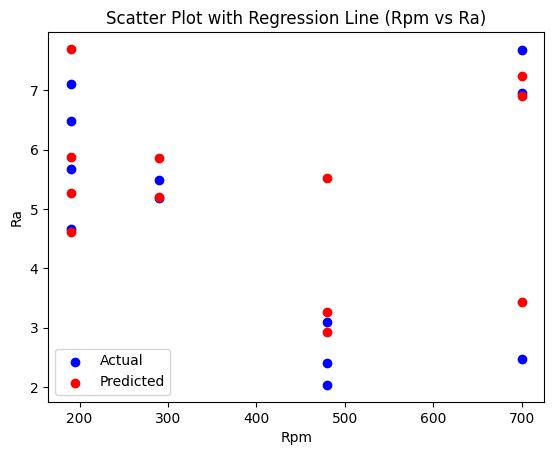

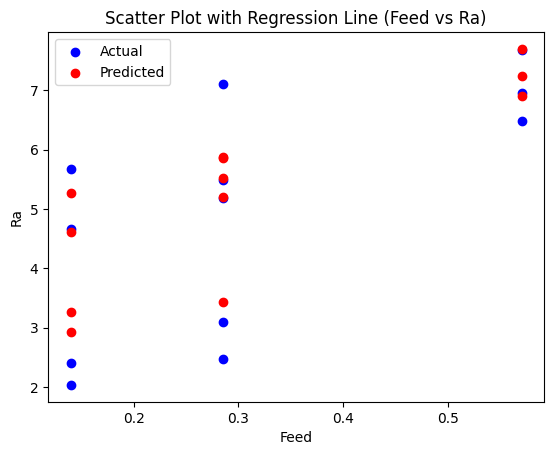

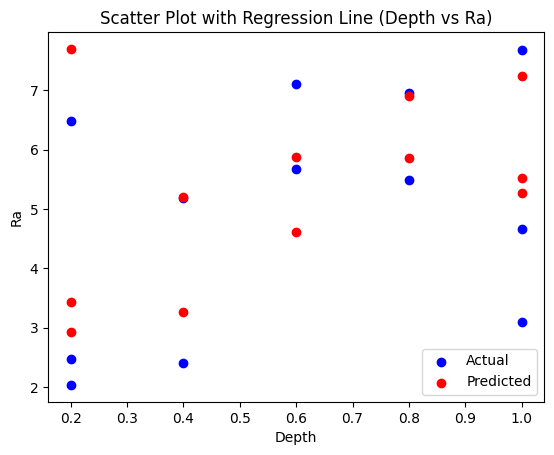

In [9]:
for i, col in enumerate(X.columns):
    plt.figure(i)
    plt.scatter(X_test[col], y_test, color='blue', label='Actual')
    plt.scatter(X_test[col], y_pred, color='red', label='Predicted')
    plt.title(f'Scatter Plot with Regression Line ({col} vs Ra)')
    plt.xlabel(col)
    plt.ylabel('Ra')
    plt.legend()
    plt.show()

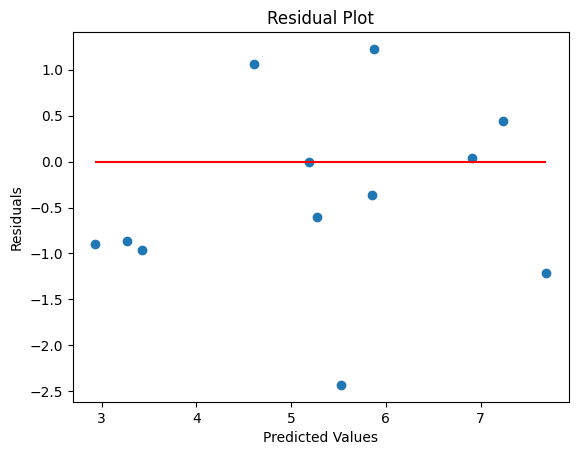

In [10]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(0, min(y_pred), max(y_pred), colors='red')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

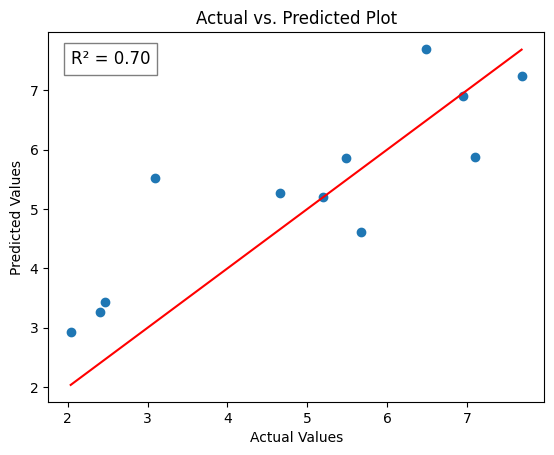

In [11]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs. Predicted Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.text(min(y_test), max(y_test), f'R² = {r2:.2f}', fontsize=12, verticalalignment='top', bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


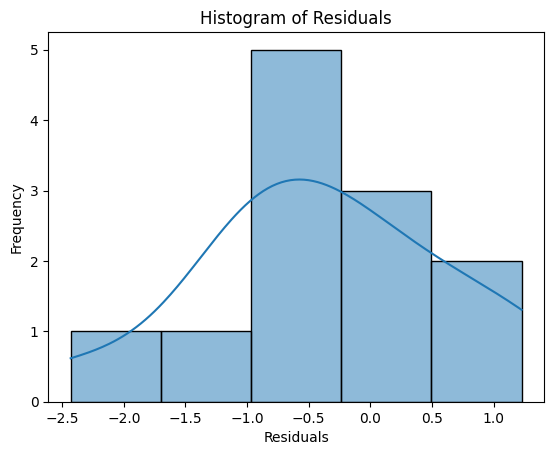

In [12]:
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

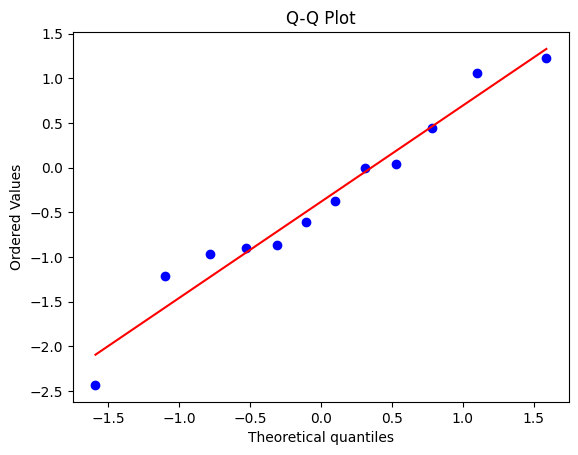

In [13]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

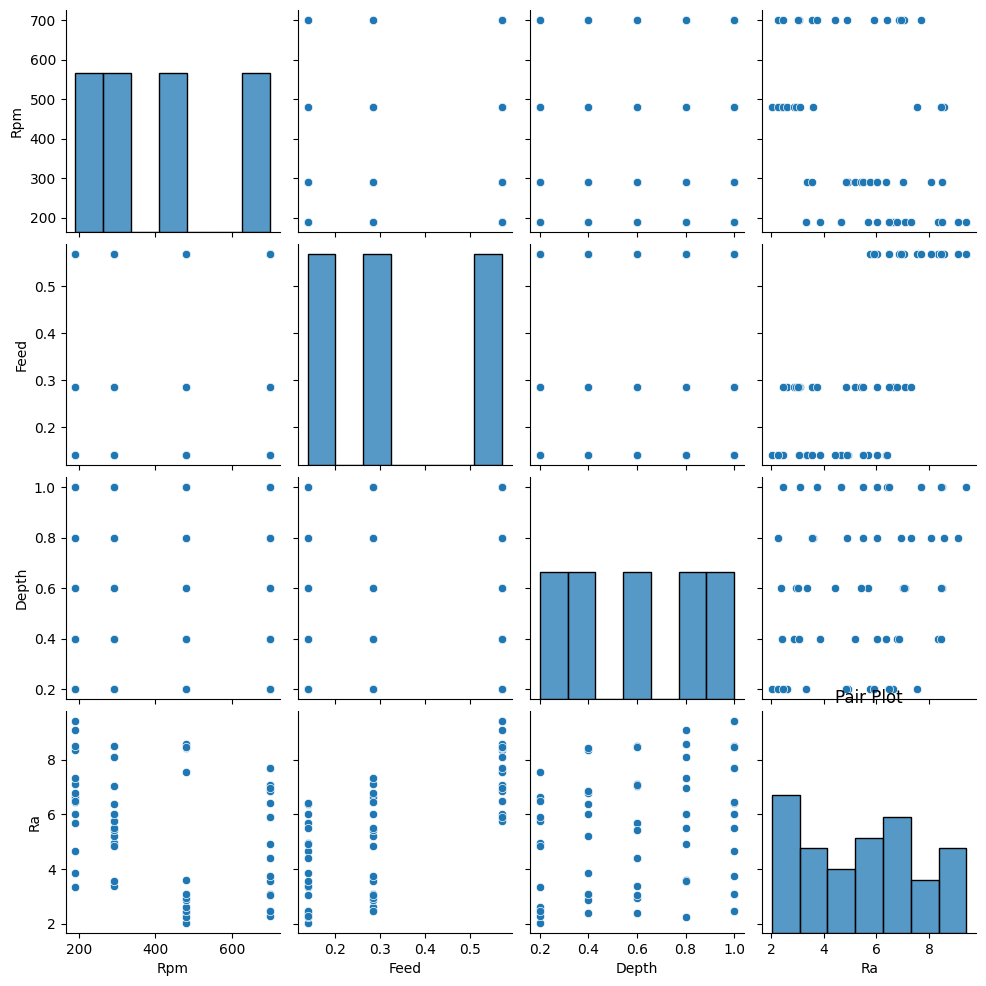

In [14]:
sns.pairplot(data[['Rpm', 'Feed', 'Depth', 'Ra']])
plt.title('Pair Plot')
plt.show()

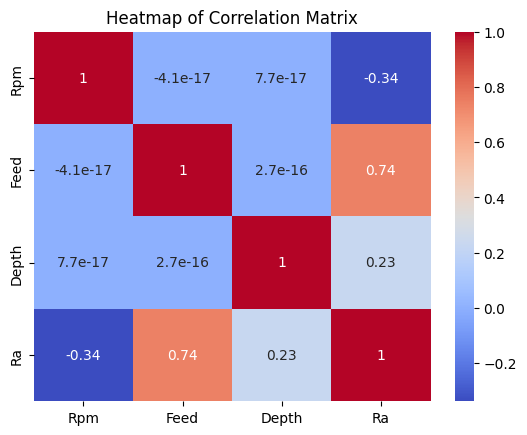

In [15]:
corr_matrix = data[['Rpm', 'Feed', 'Depth', 'Ra']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [16]:
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

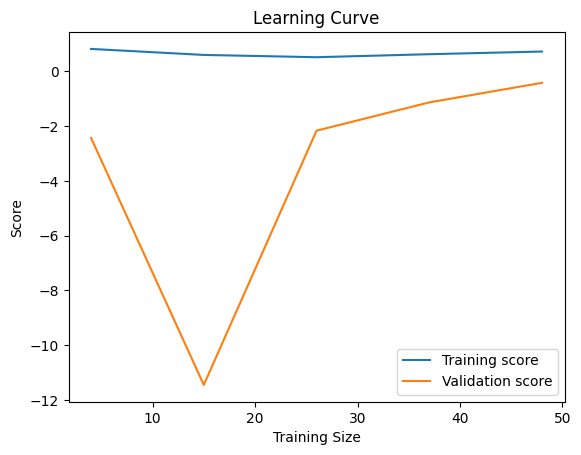

In [17]:
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Validation score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


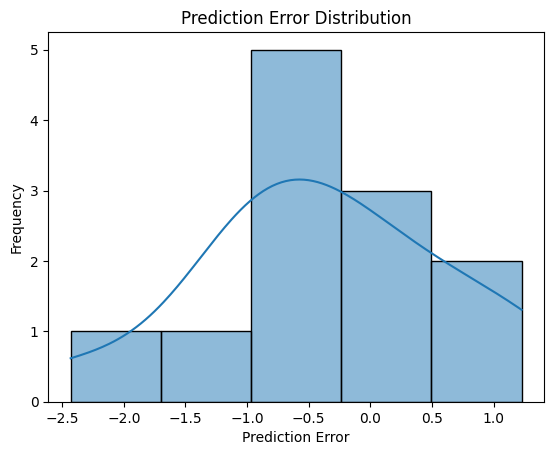

In [18]:
prediction_errors = y_test - y_pred
sns.histplot(prediction_errors, kde=True)
plt.title('Prediction Error Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

# **TRYING WITH SVM (Only 3 inputs)**

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats

In [20]:

file_path = '/kaggle/input/iitd-m-tech-smart-lathe-input/IITD M.Tech Smart Lathe Inputs/Experiment Summary.xlsx'  
data = pd.read_excel(file_path)

X = data.iloc[:, 1:4]  
y = data.iloc[:, 4]   

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# model training
model = SVR(kernel='linear')  
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [21]:
intercept = model.intercept_[0]
coefficients = model.coef_[0]
print(f'Equation of the hyperplane: Ra = {intercept:.4f} + {coefficients[0]:.4f} * Rpm + {coefficients[1]:.4f} * Feed + {coefficients[2]:.4f} * Depth')

r2 = r2_score(y_test, y_pred)
print(f'R² value: {r2}')

new_data_point = np.array([[480, 0.14, 1]])
predicted_value = model.predict(new_data_point)
print(f'Predicted Ra value for Rpm=480, Feed=0.14, Depth=1: {predicted_value[0]}')

Equation of the hyperplane: Ra = 5.9123 + -0.0054 * Rpm + 3.8704 * Feed + 0.6654 * Depth
R² value: 0.3921455659579458
Predicted Ra value for Rpm=480, Feed=0.14, Depth=1: 4.52721447595587


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


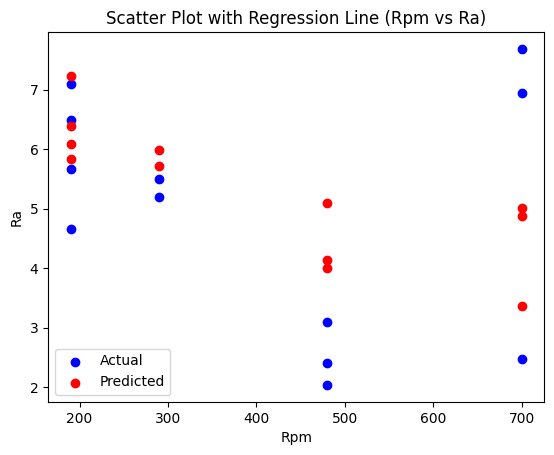

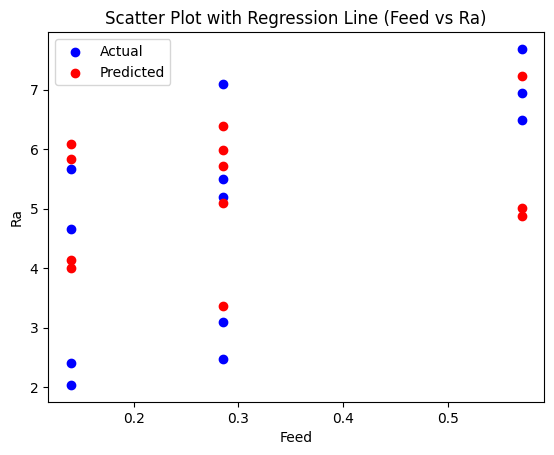

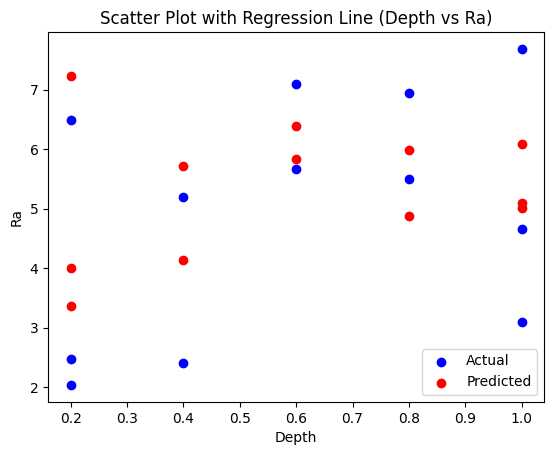

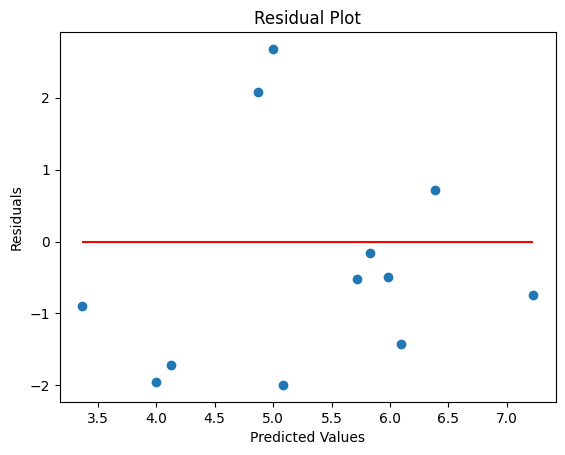

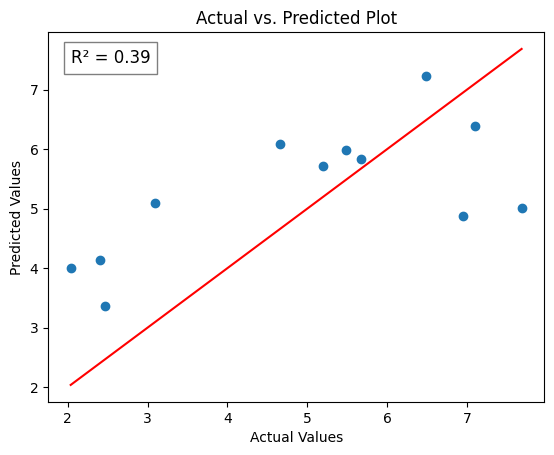

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


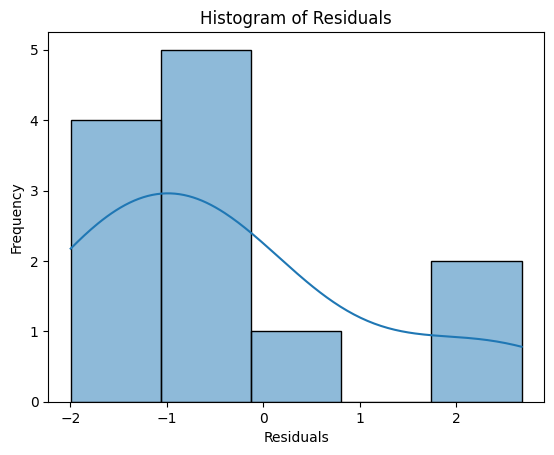

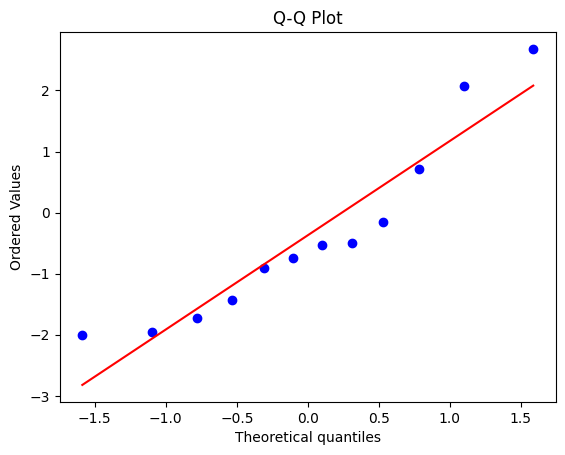

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

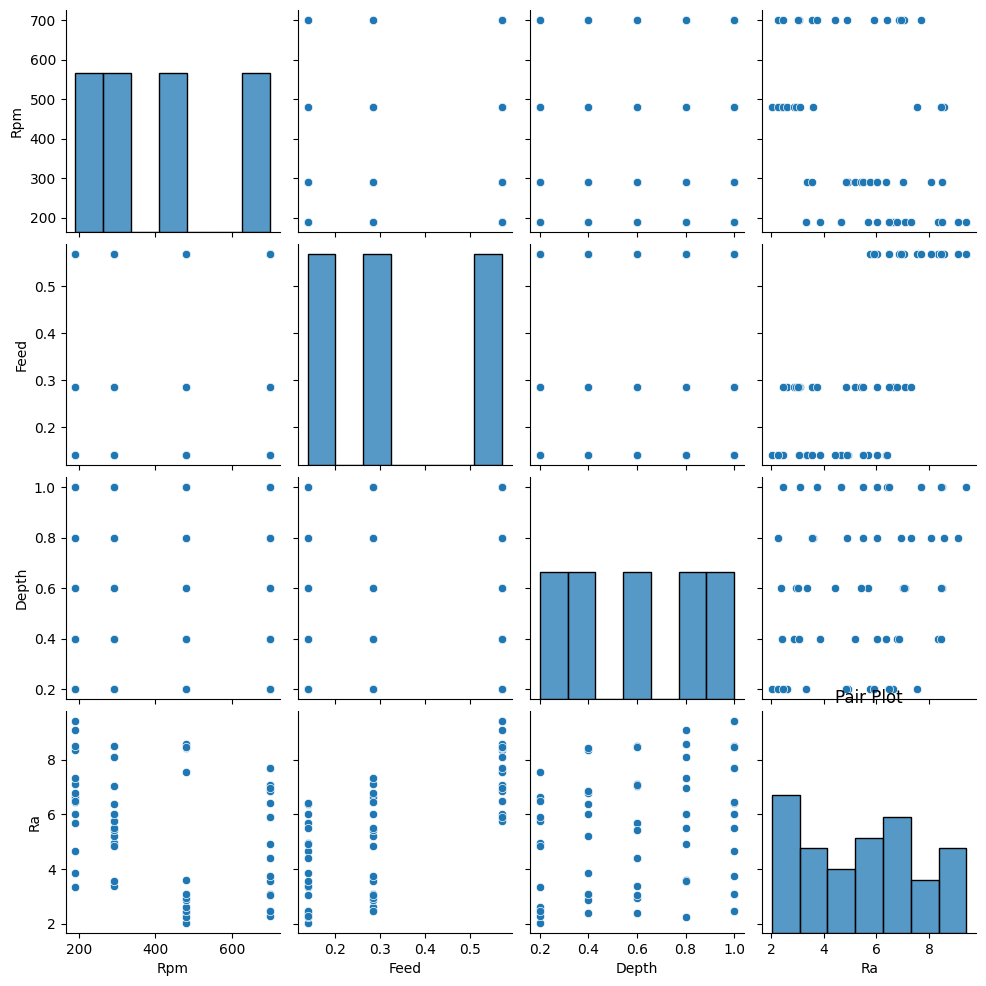

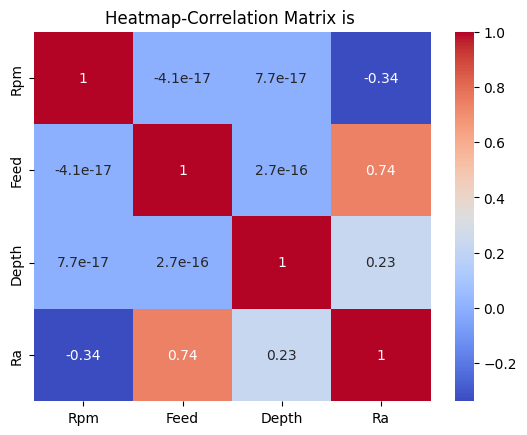

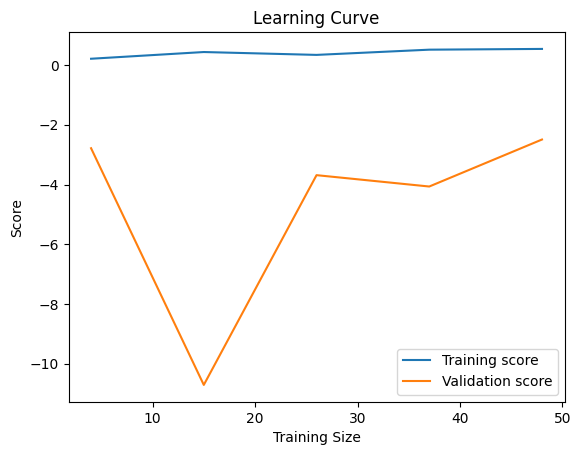

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


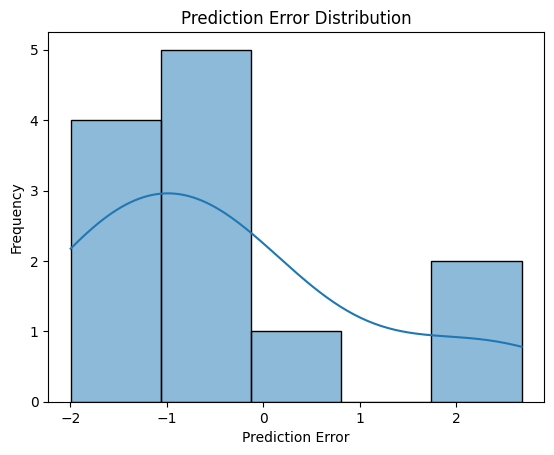

In [22]:
for i, col in enumerate(X.columns):
    plt.figure(i)
    plt.scatter(X_test[col], y_test, color='blue', label='Actual')
    plt.scatter(X_test[col], y_pred, color='red', label='Predicted')
    plt.title(f'Scatter Plot with Regression Line ({col} vs Ra)')
    plt.xlabel(col)
    plt.ylabel('Ra')
    plt.legend()
    plt.show()

#residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.hlines(0, min(y_pred), max(y_pred), colors='red')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# actual v pred
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs. Predicted Plot')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.text(min(y_test), max(y_test), f'R² = {r2:.2f}', fontsize=12, verticalalignment='top', bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 5})
plt.show()

# residual hist.
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# q-q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

#pair plot
sns.pairplot(data[['Rpm', 'Feed', 'Depth', 'Ra']])
plt.title('Pair Plot')
plt.show()

#heatmap-correlation
corr_matrix = data[['Rpm', 'Feed', 'Depth', 'Ra']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap-Correlation Matrix is ')
plt.show()

# learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Validation score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()

# error dist.
prediction_errors = y_test - y_pred
sns.histplot(prediction_errors, kde=True)
plt.title('Prediction Error Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()

# **ANN (Only 3 inputs)**


2024-06-26 05:37:20.763477: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-26 05:37:20.763628: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-26 05:37:20.919310: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


   Experiment  Rpm  Feed  Depth     Ra
0           1  190  0.14    0.2  3.324
1           2  190  0.14    0.4  3.843
2           3  190  0.14    0.6  5.671
3           4  190  0.14    0.8  6.025
4           5  190  0.14    1.0  4.664
Epoch 1/300


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 30.4770 - val_loss: 35.5190
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 31.1011 - val_loss: 33.7895
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 29.4118 - val_loss: 32.0201
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 26.8454 - val_loss: 30.2401
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 27.5017 - val_loss: 28.2870
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 24.3995 - val_loss: 26.2118
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22.6678 - val_loss: 24.0540
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21.3285 - val_loss: 21.7588
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17.8269 - val_loss: 19.3090
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.2249 - val_loss: 16.7694
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.9217 - val_loss: 14.1992
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.9026 - val_lo

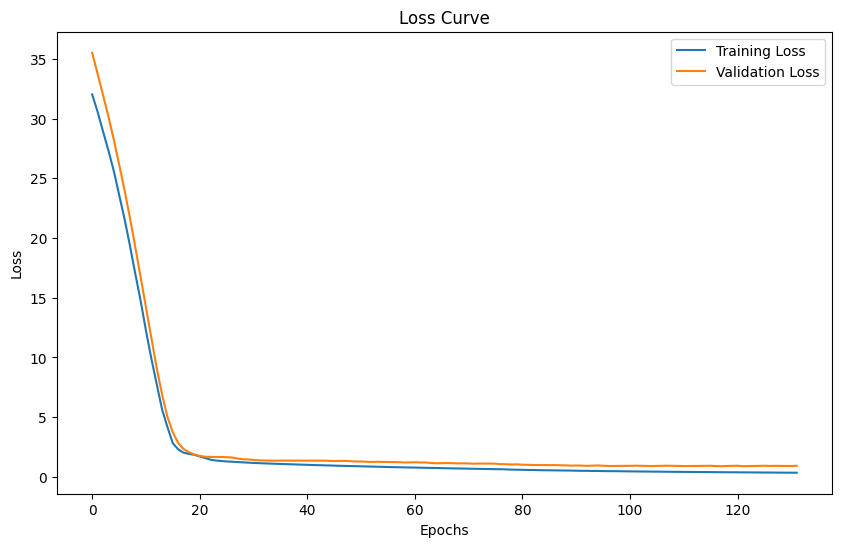

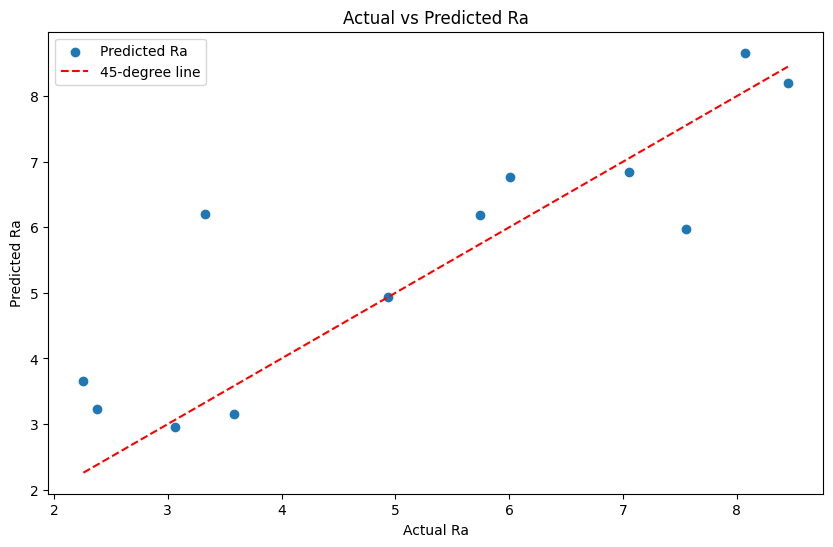

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


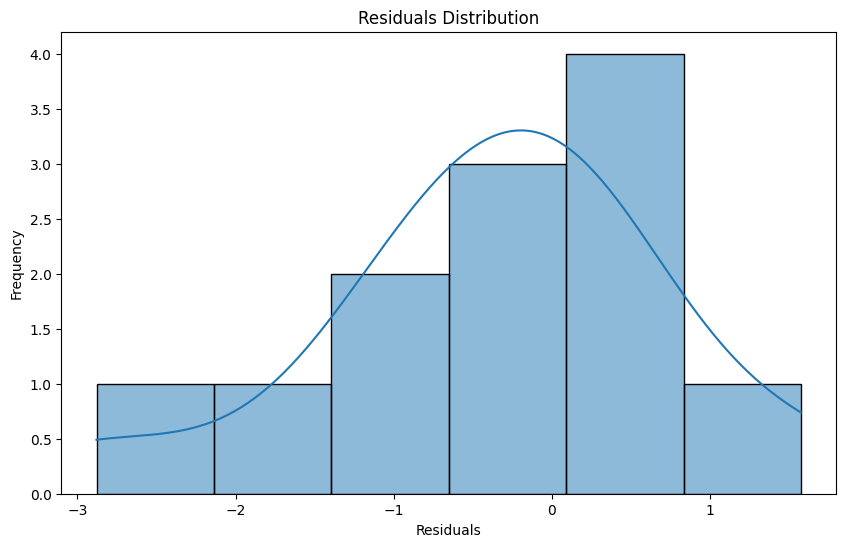

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

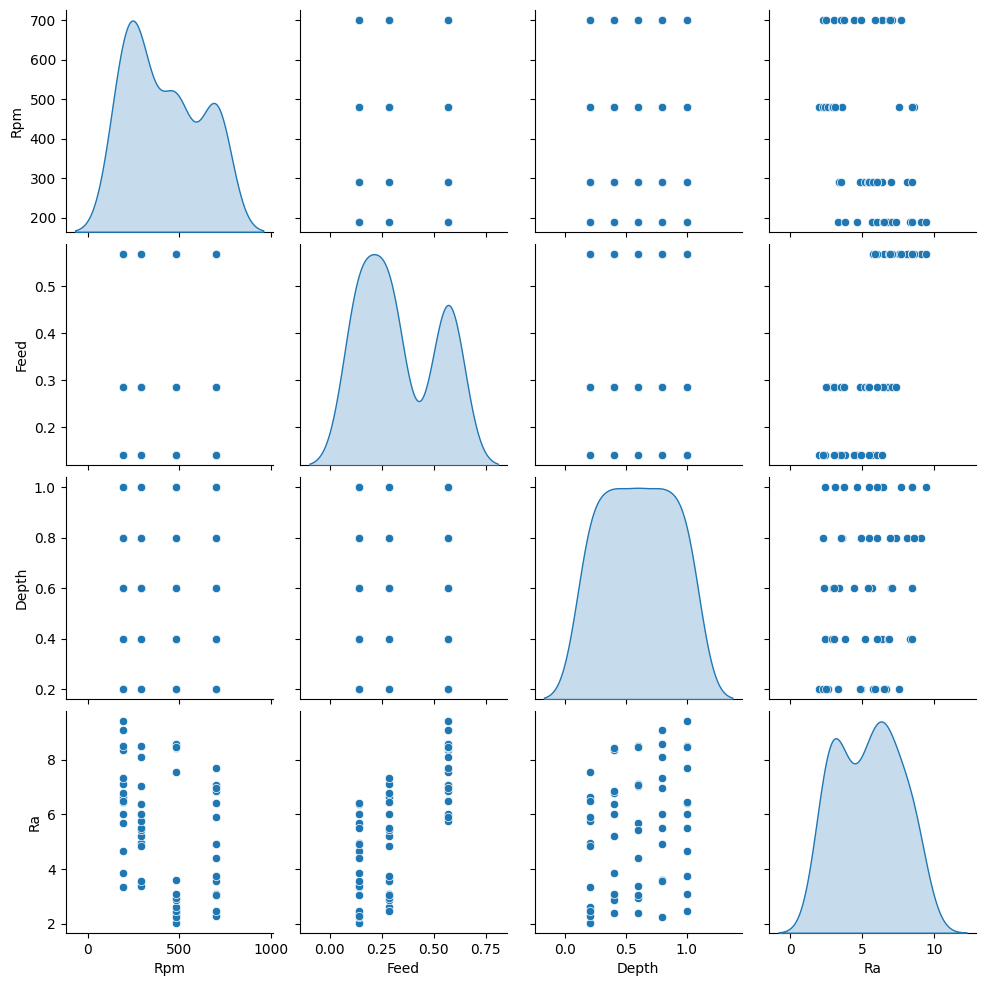

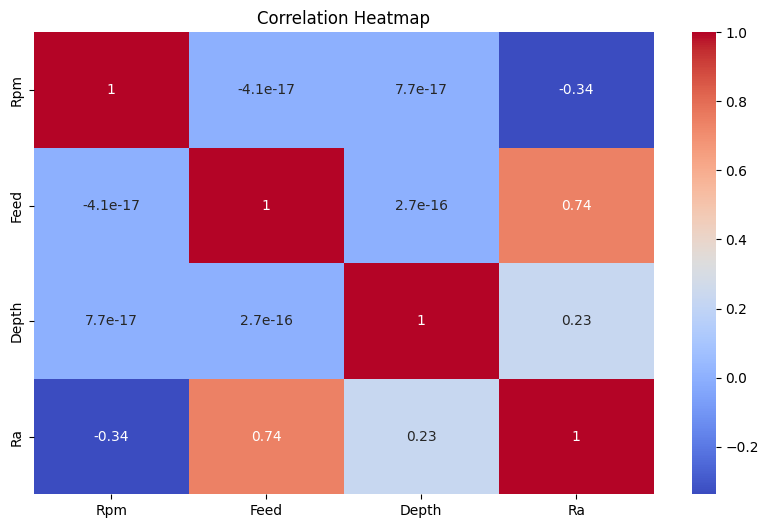

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

file_path = '/kaggle/input/iitd-m-tech-smart-lathe-input/IITD M.Tech Smart Lathe Inputs/Experiment Summary.xlsx'  # Replace with your file path
data = pd.read_excel(file_path)
print(data.head())

X = data.iloc[:, 1:4].values  
y = data.iloc[:, 4].values    

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#ann model
model = Sequential()

model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))  # layer 1
model.add(Dense(units=32, activation='relu')) # layer 2
model.add(Dense(units=16, activation='relu')) # layer 3
model.add(Dense(units=1)) # o/p layer

model.compile(optimizer='adam', loss='mean_squared_error')

#model training
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=300, validation_split=0.2, batch_size=10, callbacks=[early_stopping])

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f'R² value: {r2}')

# loss curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# actyal v pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Predicted Ra')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='45-degree line')
plt.title('Actual vs Predicted Ra')
plt.xlabel('Actual Ra')
plt.ylabel('Predicted Ra')
plt.legend()
plt.show()

# residual
residuals = y_test - y_pred.reshape(-1)
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

#pair
sns.pairplot(data.iloc[:, 1:5], diag_kind='kde')
plt.show()

#correlation
plt.figure(figsize=(10, 6))
sns.heatmap(data.iloc[:, 1:5].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()




#  **CNN (Only 3 inputs)**

Epoch 1/500


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 34.3621 - val_loss: 36.3394
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 27.9290 - val_loss: 34.2845
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 27.3276 - val_loss: 32.3047
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 26.3328 - val_loss: 30.3279
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 26.6700 - val_loss: 28.2337
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.0036 - val_loss: 25.9864
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 20.7805 - val_loss: 23.5770
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.4774 - val_loss: 21.0328
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.2849 - val_loss: 18.3260
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.4695 - val_loss: 15.5866
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.3411 - val_loss: 12.9382
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.9121 - val_los

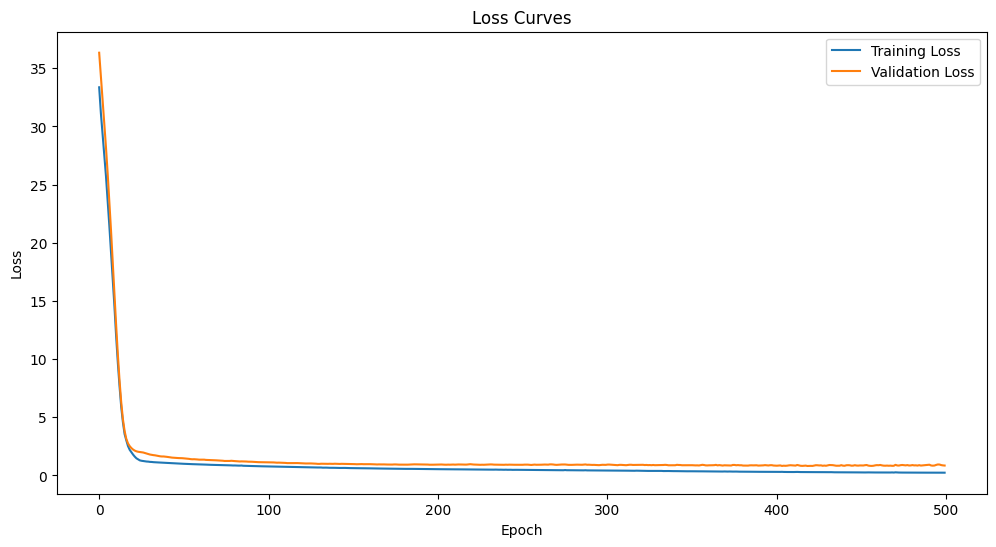

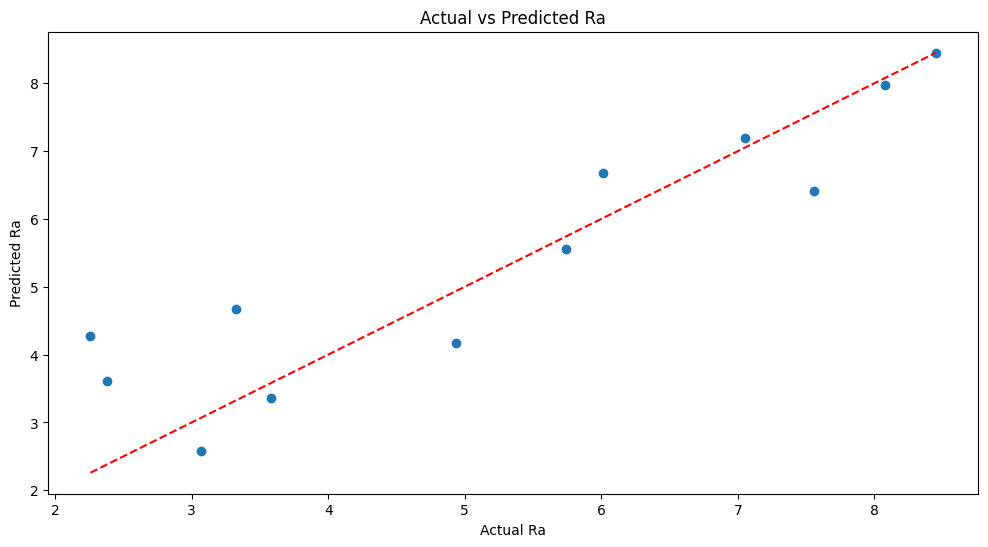

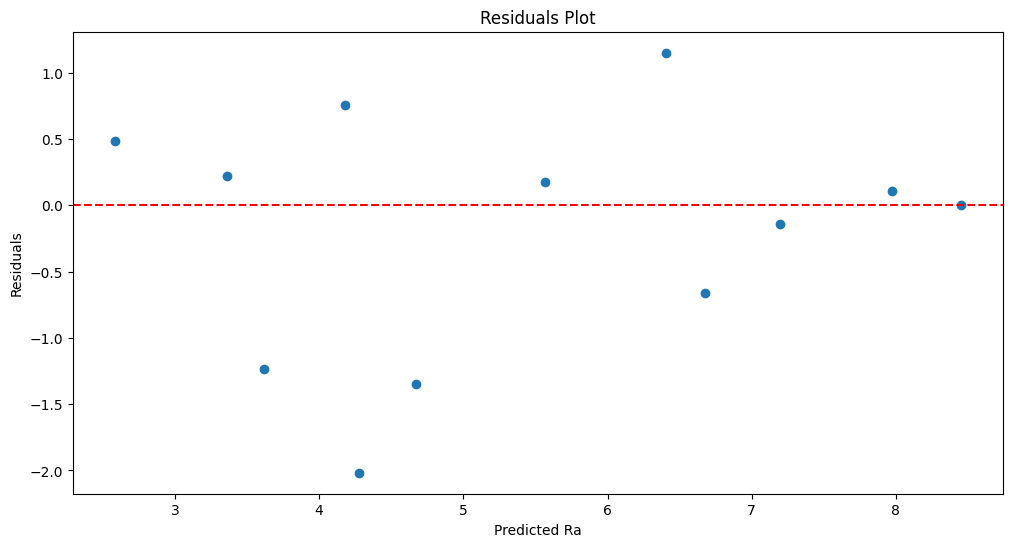

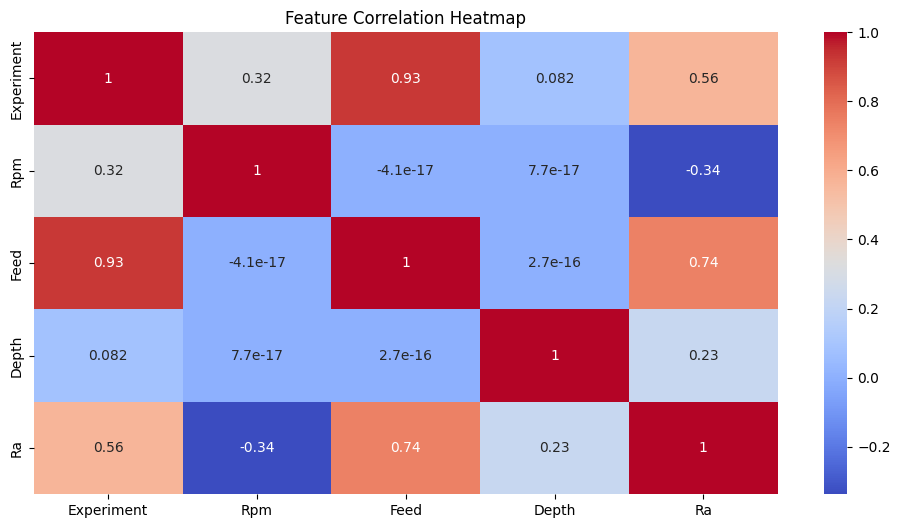

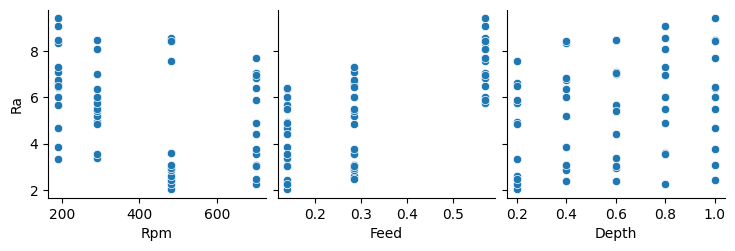

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('/kaggle/input/iitd-m-tech-smart-lathe-input/IITD M.Tech Smart Lathe Inputs/Experiment Summary.xlsx')


X = df.iloc[:, [1, 2, 3]].values  
y = df.iloc[:, 4].values         

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#standerdization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

#cnn model
model = Sequential([
    Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train_cnn, y_train, epochs=500, validation_split=0.2, batch_size=10, verbose=1)

y_pred = model.predict(X_test_cnn).flatten()

r2 = r2_score(y_test, y_pred)
print(f'R² value: {r2}')

#loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()

#act v pred
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Ra')
plt.ylabel('Predicted Ra')
plt.title('Actual vs Predicted Ra')
plt.show()

#residual
residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Ra')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.axhline(0, color='r', linestyle='--')
plt.show()

#correlation
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

#pairplot
sns.pairplot(df, y_vars=['Ra'], x_vars=['Rpm', 'Feed', 'Depth'])
plt.show()


# **LSTM (Only 3 inputs)**

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - loss: 33.0394 - val_loss: 37.2943
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 33.7120 - val_loss: 36.1466
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 29.5158 - val_loss: 34.4028
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 29.3849 - val_loss: 31.6646
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 24.3815 - val_loss: 27.2699
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 20.9752 - val_loss: 20.3718
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 14.4850 - val_loss: 10.9059
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.4924 - val_loss: 3.7912
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.3222 - val_loss: 4.7109
Epoch 10/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 8.4522 - val_loss: 3.8299
Epoch 11/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.6045 - val_loss: 5.6213
Epoch 12/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/s

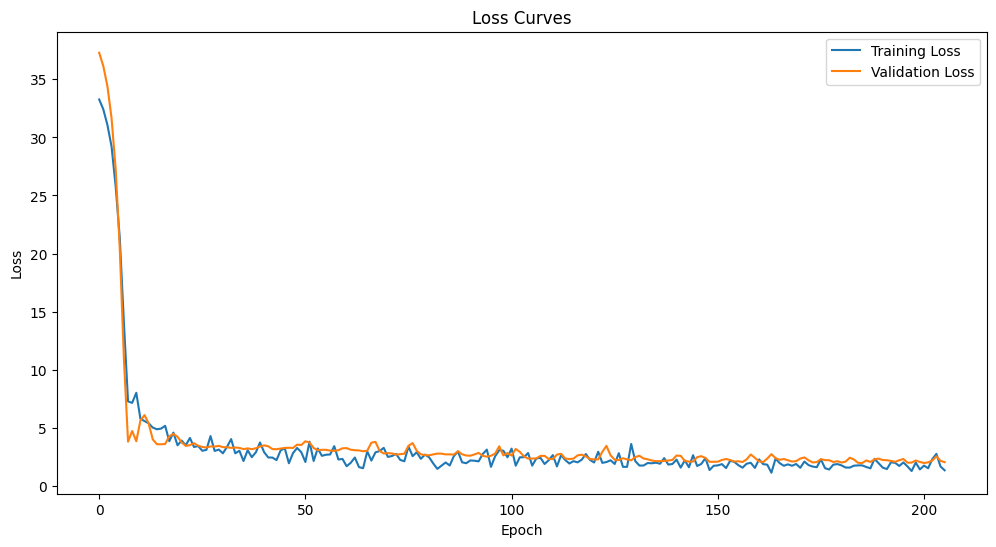

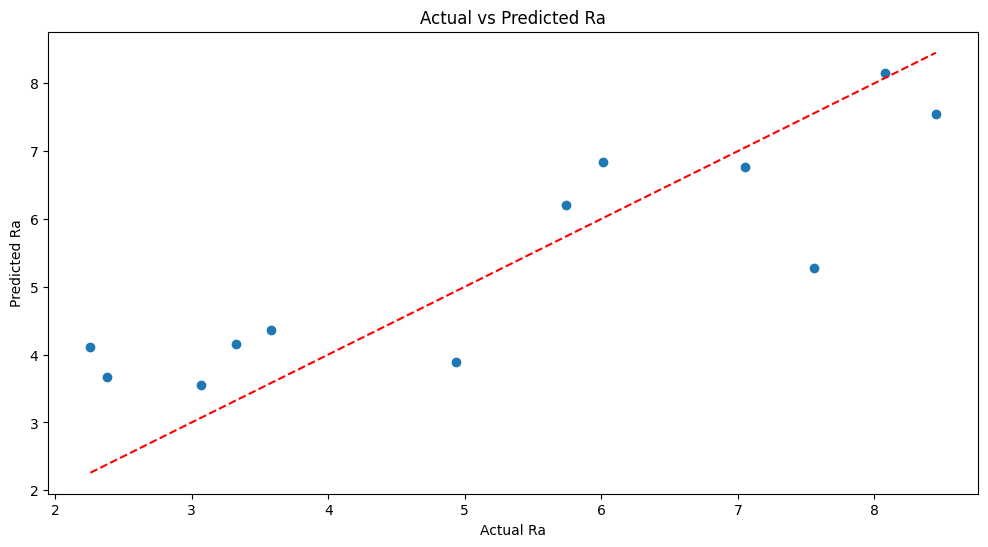

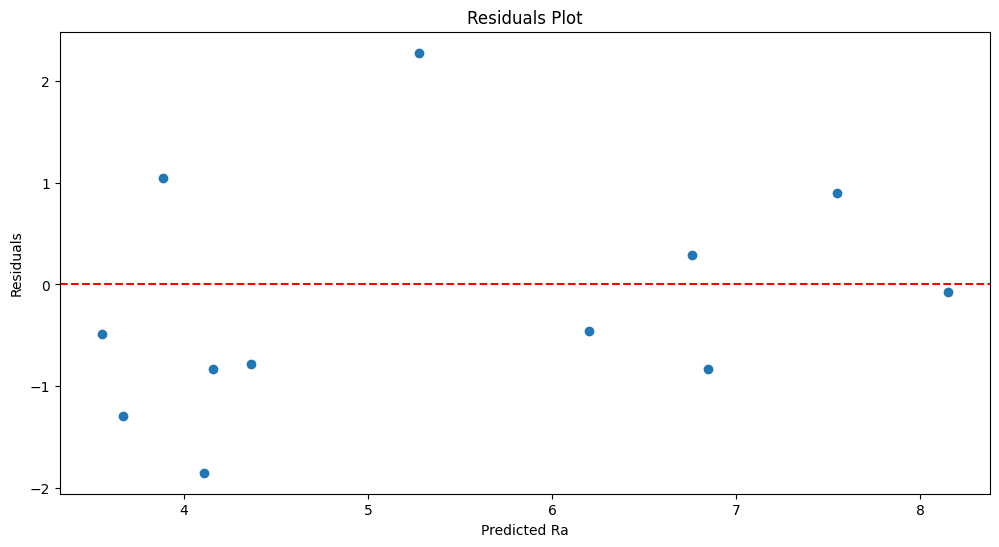

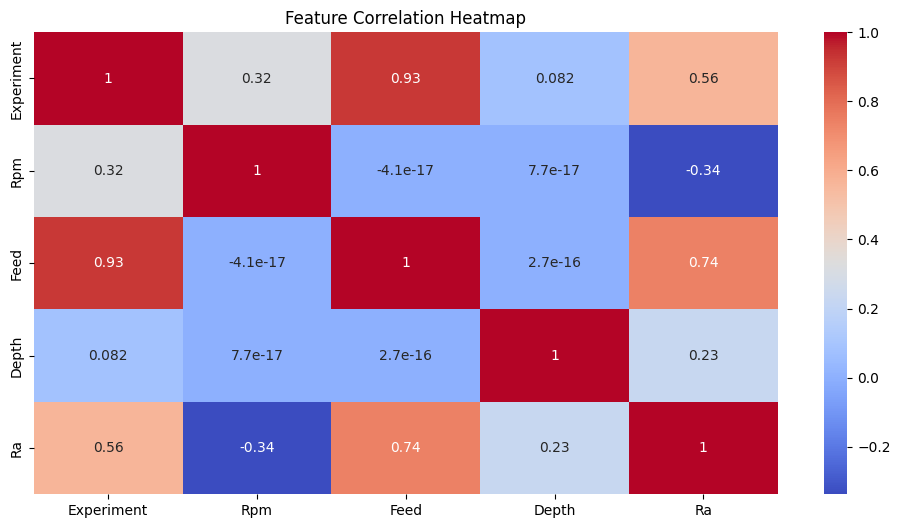

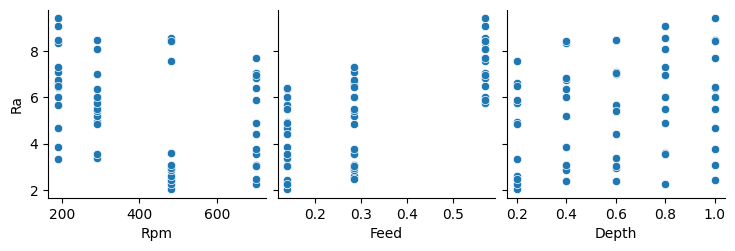

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('/kaggle/input/iitd-m-tech-smart-lathe-input/IITD M.Tech Smart Lathe Inputs/Experiment Summary.xlsx')


X = df.iloc[:, [1, 2, 3]].values  
y = df.iloc[:, 4].values          

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#lstm
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    LSTM(64, activation='relu', return_sequences=True),
    Dropout(0.3),
    LSTM(128, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history = model.fit(X_train_lstm, y_train, epochs=1000, validation_split=0.2, batch_size=10, verbose=1, callbacks=[early_stopping])

y_pred = model.predict(X_test_lstm).flatten()

r2 = r2_score(y_test, y_pred)
print(f'R² value: {r2}')

#loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()

#act v pred
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Ra')
plt.ylabel('Predicted Ra')
plt.title('Actual vs Predicted Ra')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(12, 6))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Ra')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.axhline(0, color='r', linestyle='--')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

sns.pairplot(df, y_vars=['Ra'], x_vars=['Rpm', 'Feed', 'Depth'])
plt.show()


# **Principal Component Analysis (PCA) (Only 3 inputs)**

R² value: 0.686283078985594


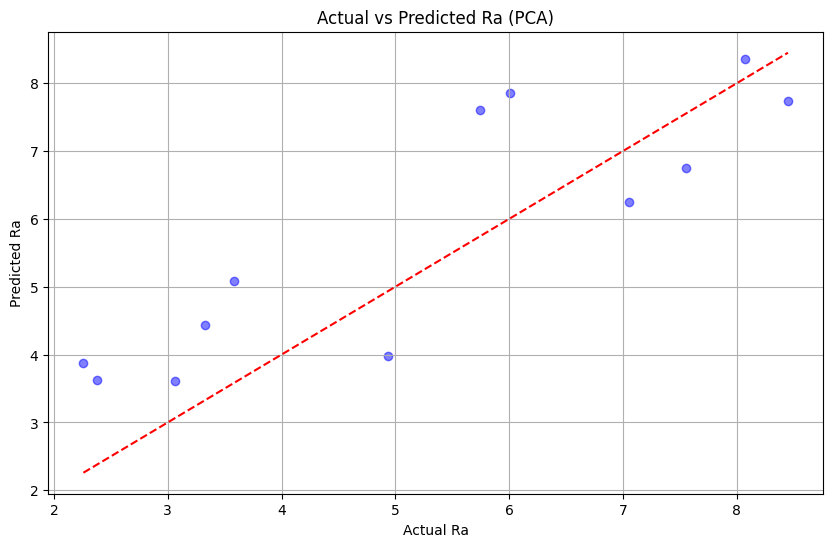

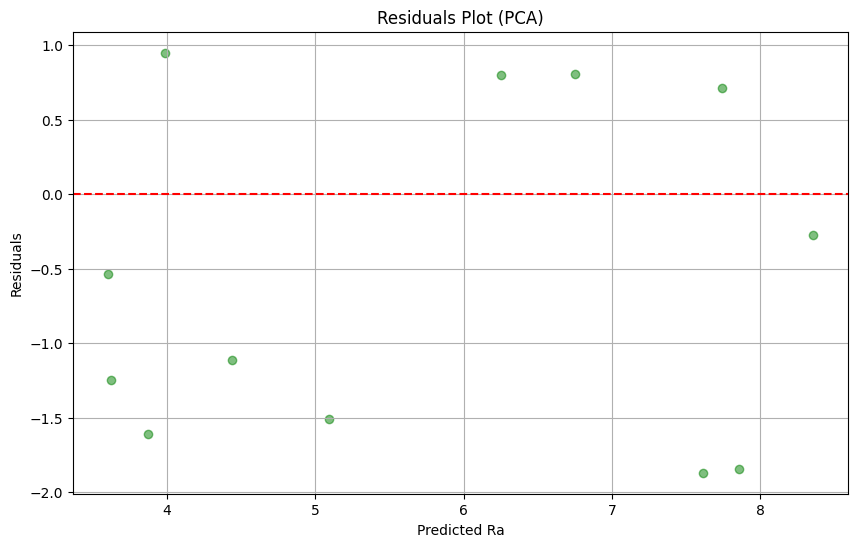

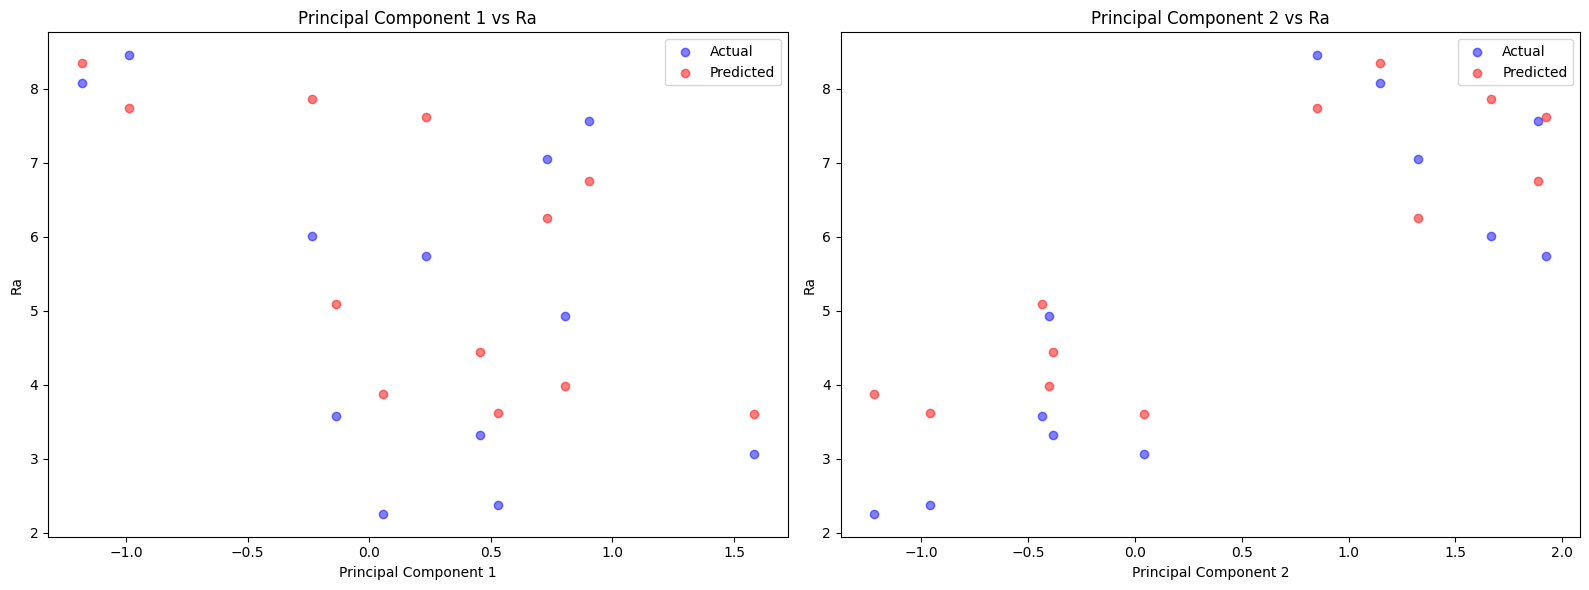

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('/kaggle/input/iitd-m-tech-smart-lathe-input/IITD M.Tech Smart Lathe Inputs/Experiment Summary.xlsx')

X = df.iloc[:, [1, 2, 3]].values  
y = df.iloc[:, 4].values         

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#pca
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

regression = LinearRegression()
regression.fit(X_train_pca, y_train)

y_pred = regression.predict(X_test_pca)

r2 = r2_score(y_test, y_pred)
print(f'R² value: {r2}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Ra')
plt.ylabel('Predicted Ra')
plt.title('Actual vs Predicted Ra (PCA)')
plt.grid(True)
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.xlabel('Predicted Ra')
plt.ylabel('Residuals')
plt.title('Residuals Plot (PCA)')
plt.axhline(0, color='r', linestyle='--')
plt.grid(True)
plt.show()

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_test_pca[:, 0], y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(X_test_pca[:, 0], y_pred, color='red', label='Predicted', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Ra')
plt.title('Principal Component 1 vs Ra')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:, 1], y_test, color='blue', label='Actual', alpha=0.5)
plt.scatter(X_test_pca[:, 1], y_pred, color='red', label='Predicted', alpha=0.5)
plt.xlabel('Principal Component 2')
plt.ylabel('Ra')
plt.title('Principal Component 2 vs Ra')
plt.legend()

plt.tight_layout()
plt.show()


# **Random Forest (Only 3 inputs)**

R² value: 0.8665026977274587
RMSE: 0.7905525011924665


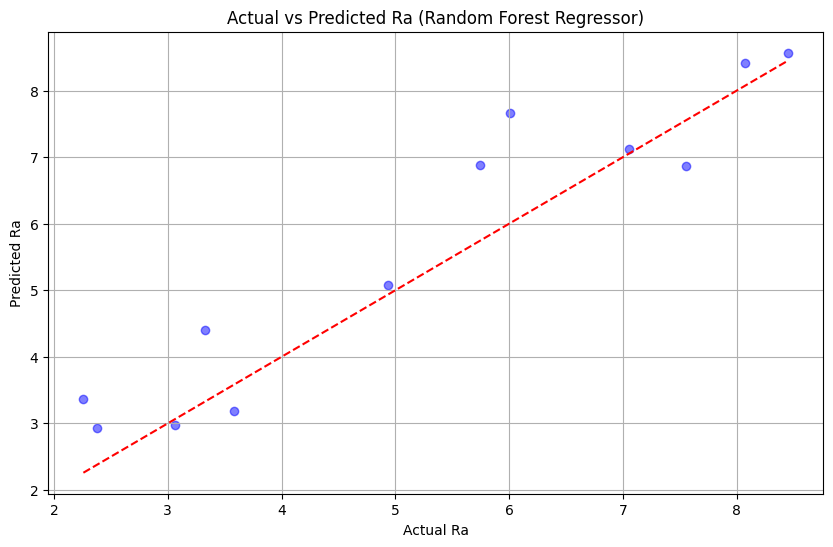

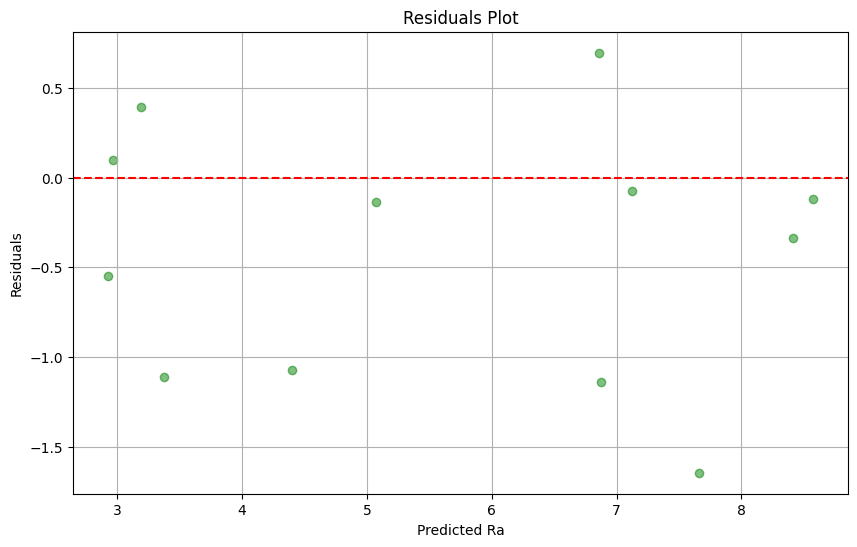

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


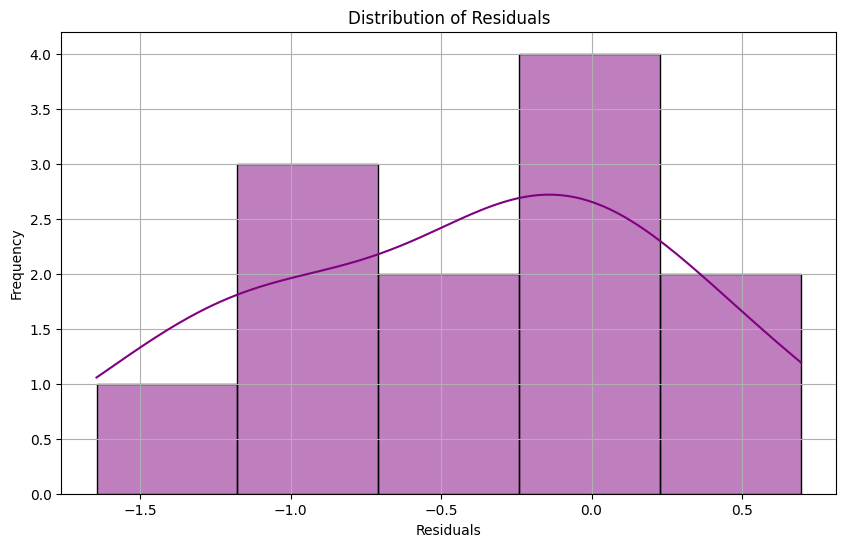

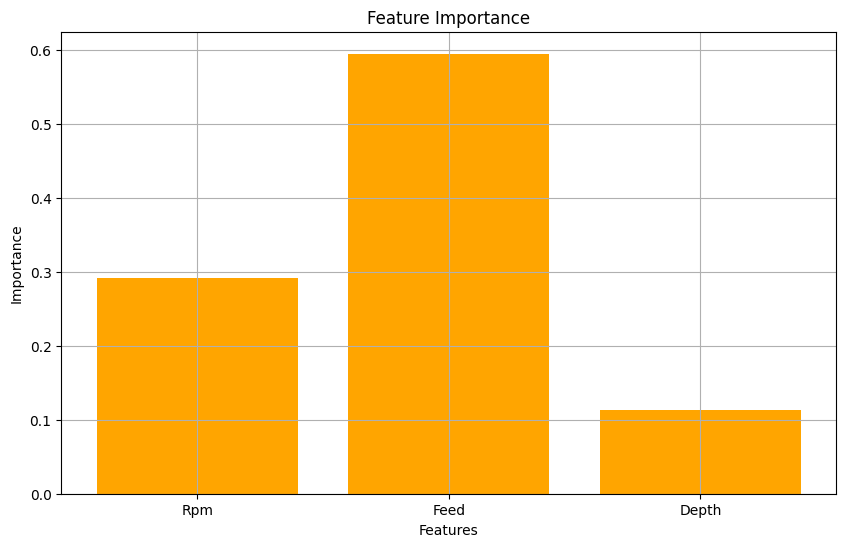

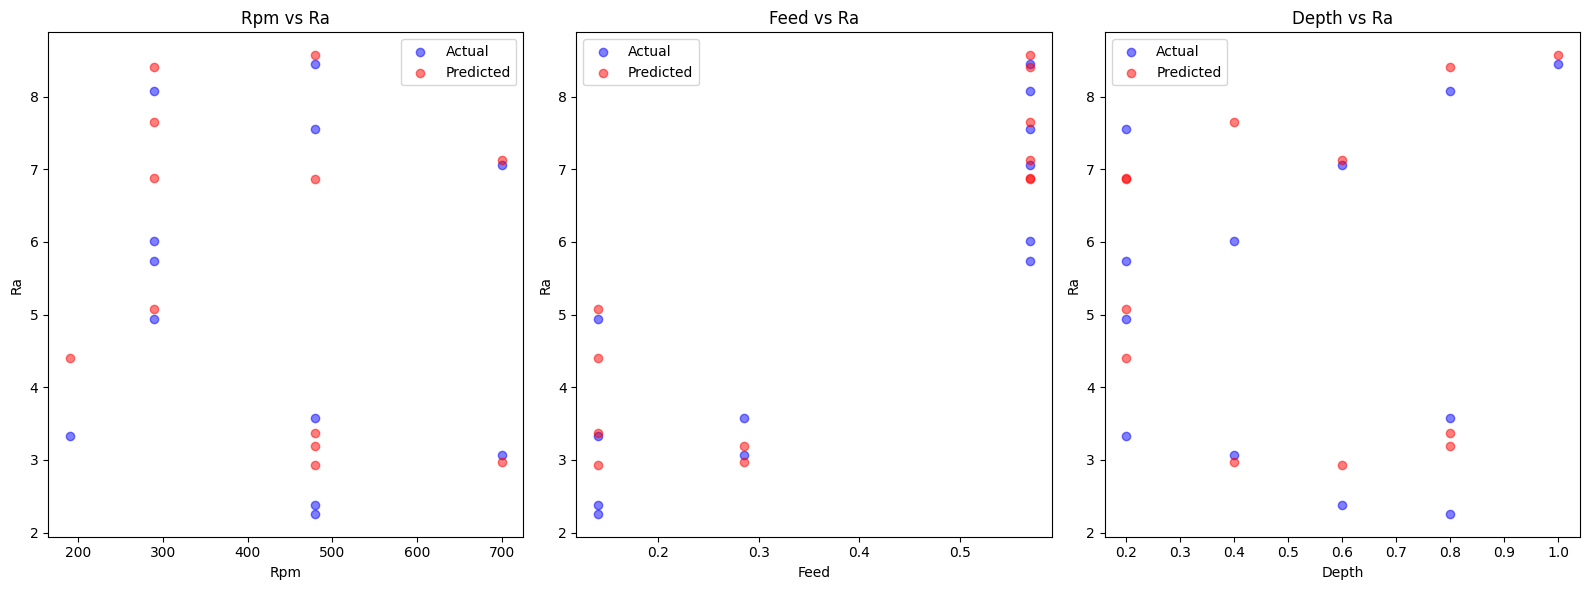

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('/kaggle/input/iitd-m-tech-smart-lathe-input/IITD M.Tech Smart Lathe Inputs/Experiment Summary.xlsx')

X = df.iloc[:, [1, 2, 3]].values  
y = df.iloc[:, 4].values         

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#RF regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)

y_pred = rf_reg.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'R² value: {r2}')
print(f'RMSE: {rmse}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Ra')
plt.ylabel('Predicted Ra')
plt.title('Actual vs Predicted Ra (Random Forest Regressor)')
plt.grid(True)
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.xlabel('Predicted Ra')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.axhline(0, color='r', linestyle='--')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()

#feature importance
feature_names = ['Rpm', 'Feed', 'Depth']
importances = rf_reg.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importances, color='orange')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.grid(True)
plt.show()

#feature v target
plt.figure(figsize=(16, 6))
for i, feature in enumerate(feature_names):
    plt.subplot(1, 3, i+1)
    plt.scatter(X_test[:, i], y_test, color='blue', label='Actual', alpha=0.5)
    plt.scatter(X_test[:, i], y_pred, color='red', label='Predicted', alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Ra')
    plt.title(f'{feature} vs Ra')
    plt.legend()
plt.tight_layout()
plt.show()


# **Ensemble Method (Stacking)(Only 3 inputs)**

R² value: 0.9022504180942783
RMSE: 0.6764752729377513


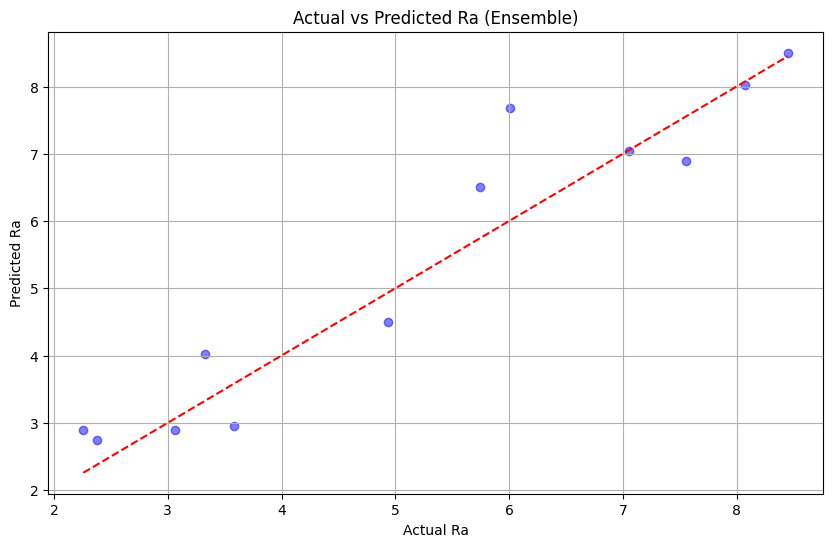

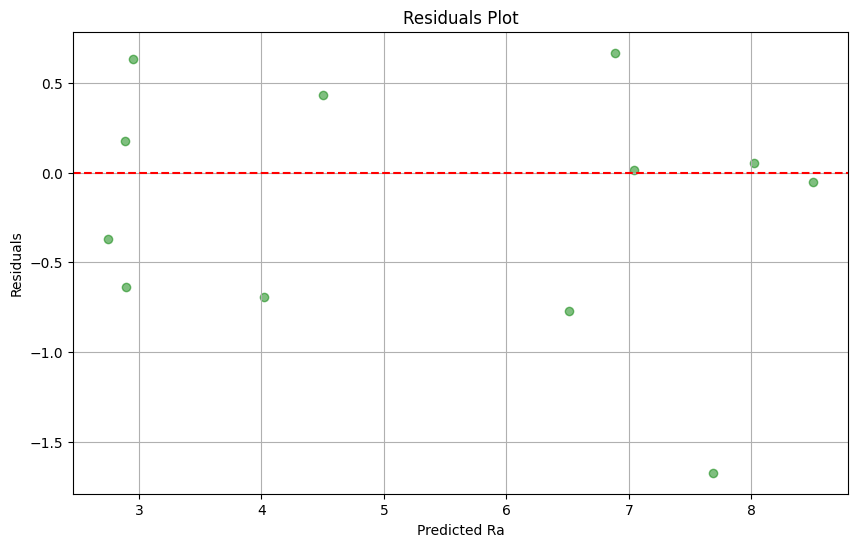

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


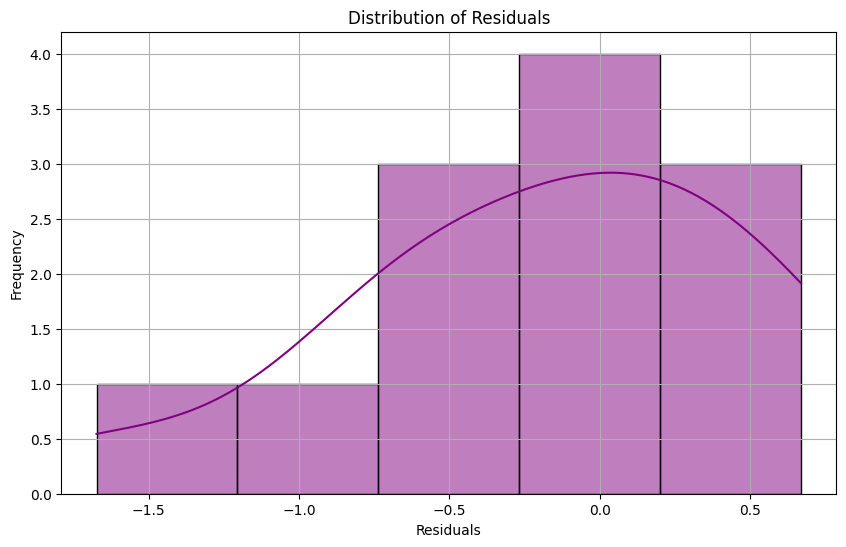

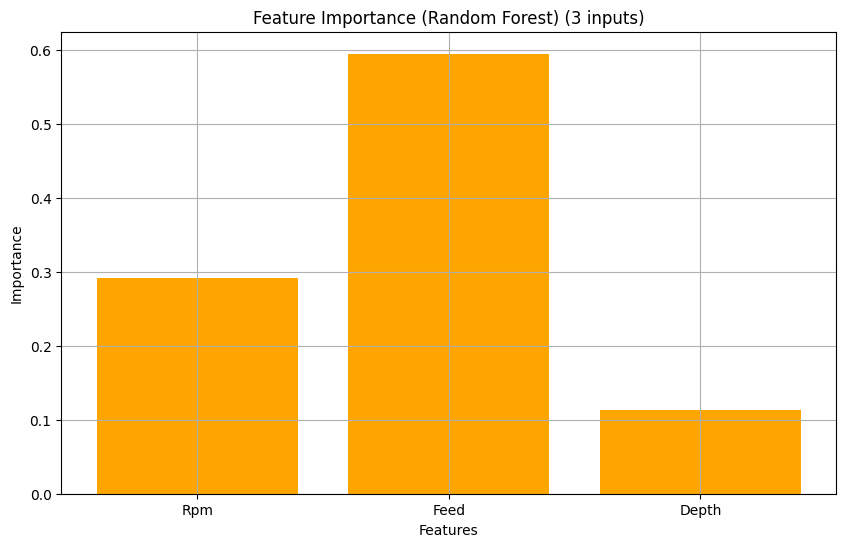

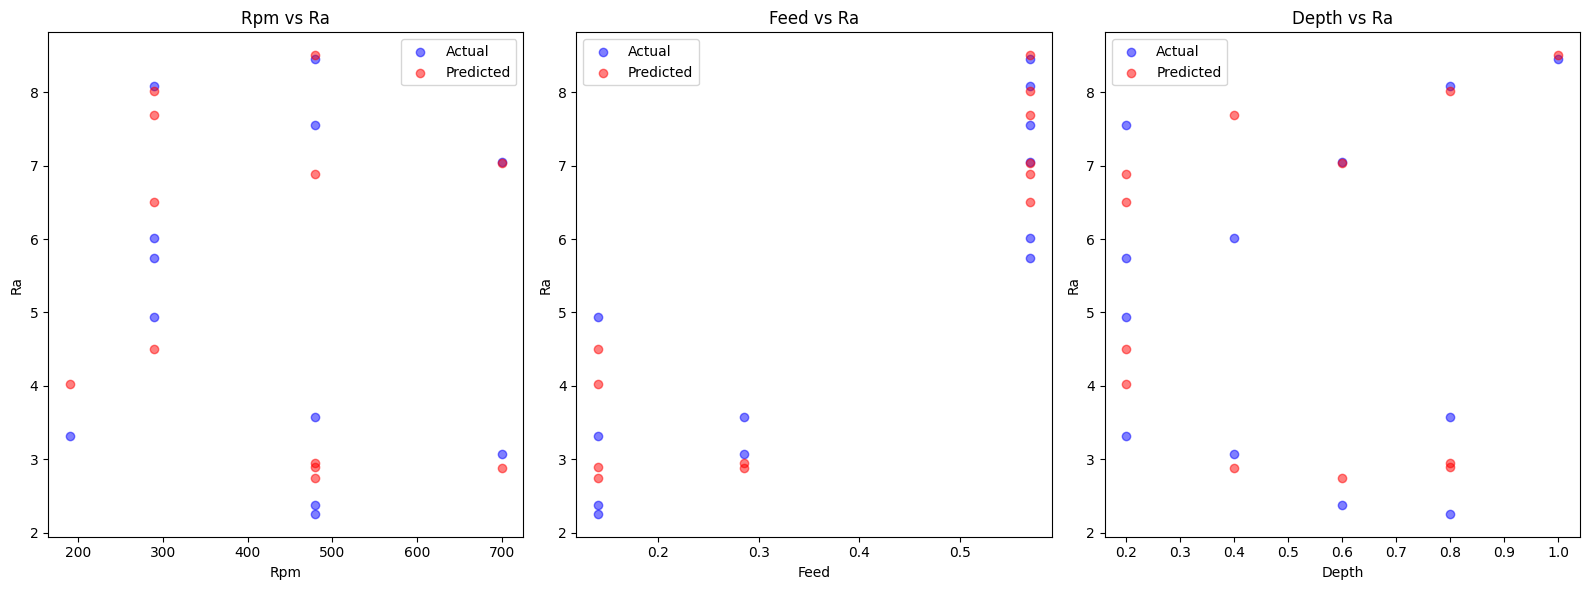

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('/kaggle/input/iitd-m-tech-smart-lathe-input/IITD M.Tech Smart Lathe Inputs/Experiment Summary.xlsx')


X = df.iloc[:, [1, 2, 3]].values  
y = df.iloc[:, 4].values         

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#ensembling
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
lr_reg = LinearRegression()

train_predictions = []
test_predictions = []

scaler = StandardScaler()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for model in [rf_reg, gb_reg]:
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_predictions.append(train_pred)
    test_predictions.append(test_pred)

X_train_stacked = np.column_stack(train_predictions)
X_test_stacked = np.column_stack(test_predictions)
X_train_stacked_scaled = scaler.fit_transform(X_train_stacked)
X_test_stacked_scaled = scaler.transform(X_test_stacked)

#metalearner training
meta_learner = lr_reg
meta_learner.fit(X_train_stacked_scaled, y_train)

meta_train_pred = meta_learner.predict(X_train_stacked_scaled)
meta_test_pred = meta_learner.predict(X_test_stacked_scaled)

r2 = r2_score(y_test, meta_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, meta_test_pred))
print(f'R² value: {r2}')
print(f'RMSE: {rmse}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, meta_test_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Ra')
plt.ylabel('Predicted Ra')
plt.title('Actual vs Predicted Ra (Ensemble)')
plt.grid(True)
plt.show()

residuals = y_test - meta_test_pred
plt.figure(figsize=(10, 6))
plt.scatter(meta_test_pred, residuals, color='green', alpha=0.5)
plt.xlabel('Predicted Ra')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.axhline(0, color='r', linestyle='--')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()

#feature importance
feature_names = ['Rpm', 'Feed', 'Depth']
importances = rf_reg.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importances, color='orange')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance (Random Forest) (3 inputs)')
plt.grid(True)
plt.show()

#o/p per i/p
plt.figure(figsize=(16, 6))
for i, feature in enumerate(feature_names):
    plt.subplot(1, 3, i+1)
    plt.scatter(X_test[:, i], y_test, color='blue', label='Actual', alpha=0.5)
    plt.scatter(X_test[:, i], meta_test_pred, color='red', label='Predicted', alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Ra')
    plt.title(f'{feature} vs Ra')
    plt.legend()
plt.tight_layout()
plt.show()


# **Ensemble methods (Stacking) (all inputs)**

R² value: 0.7942651863520339
RMSE: 0.9814052255179682


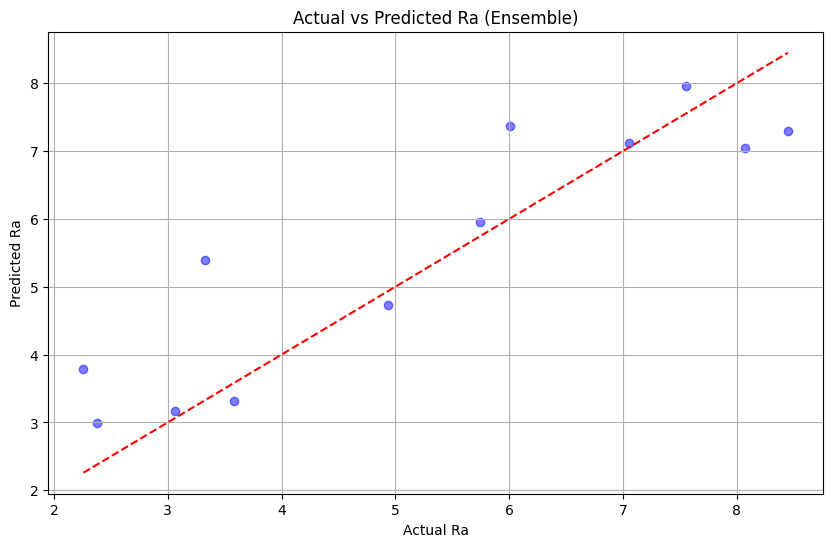

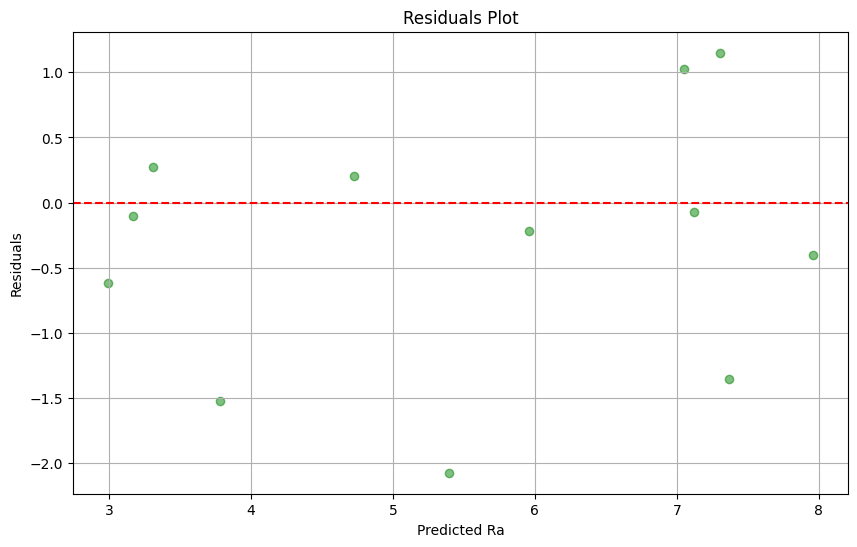

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


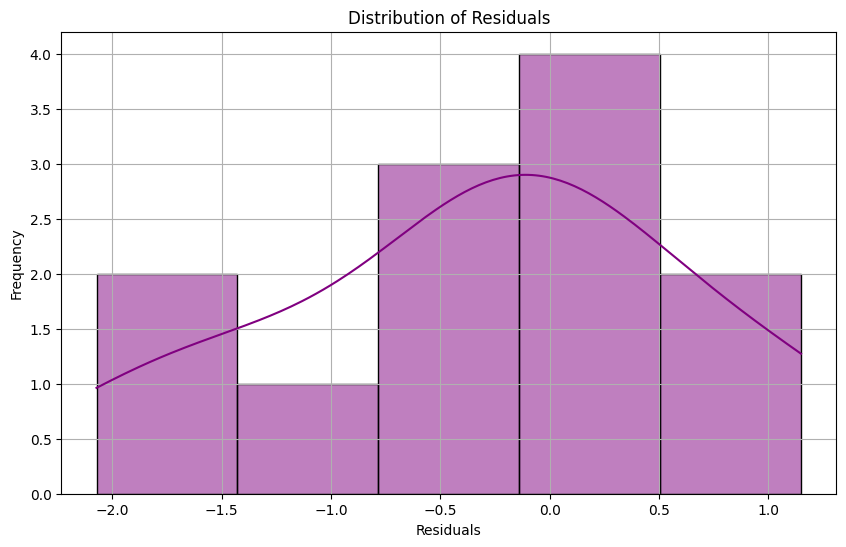

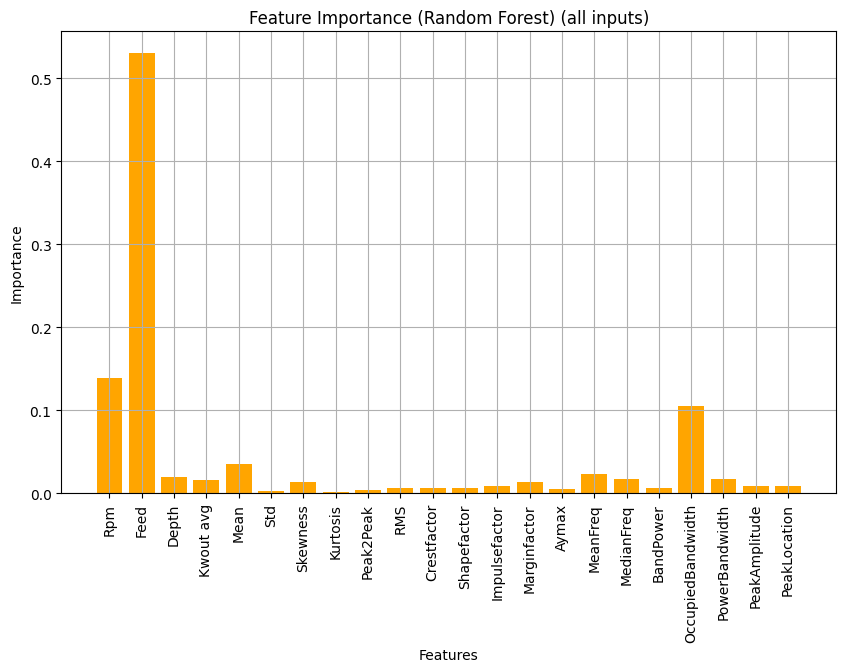

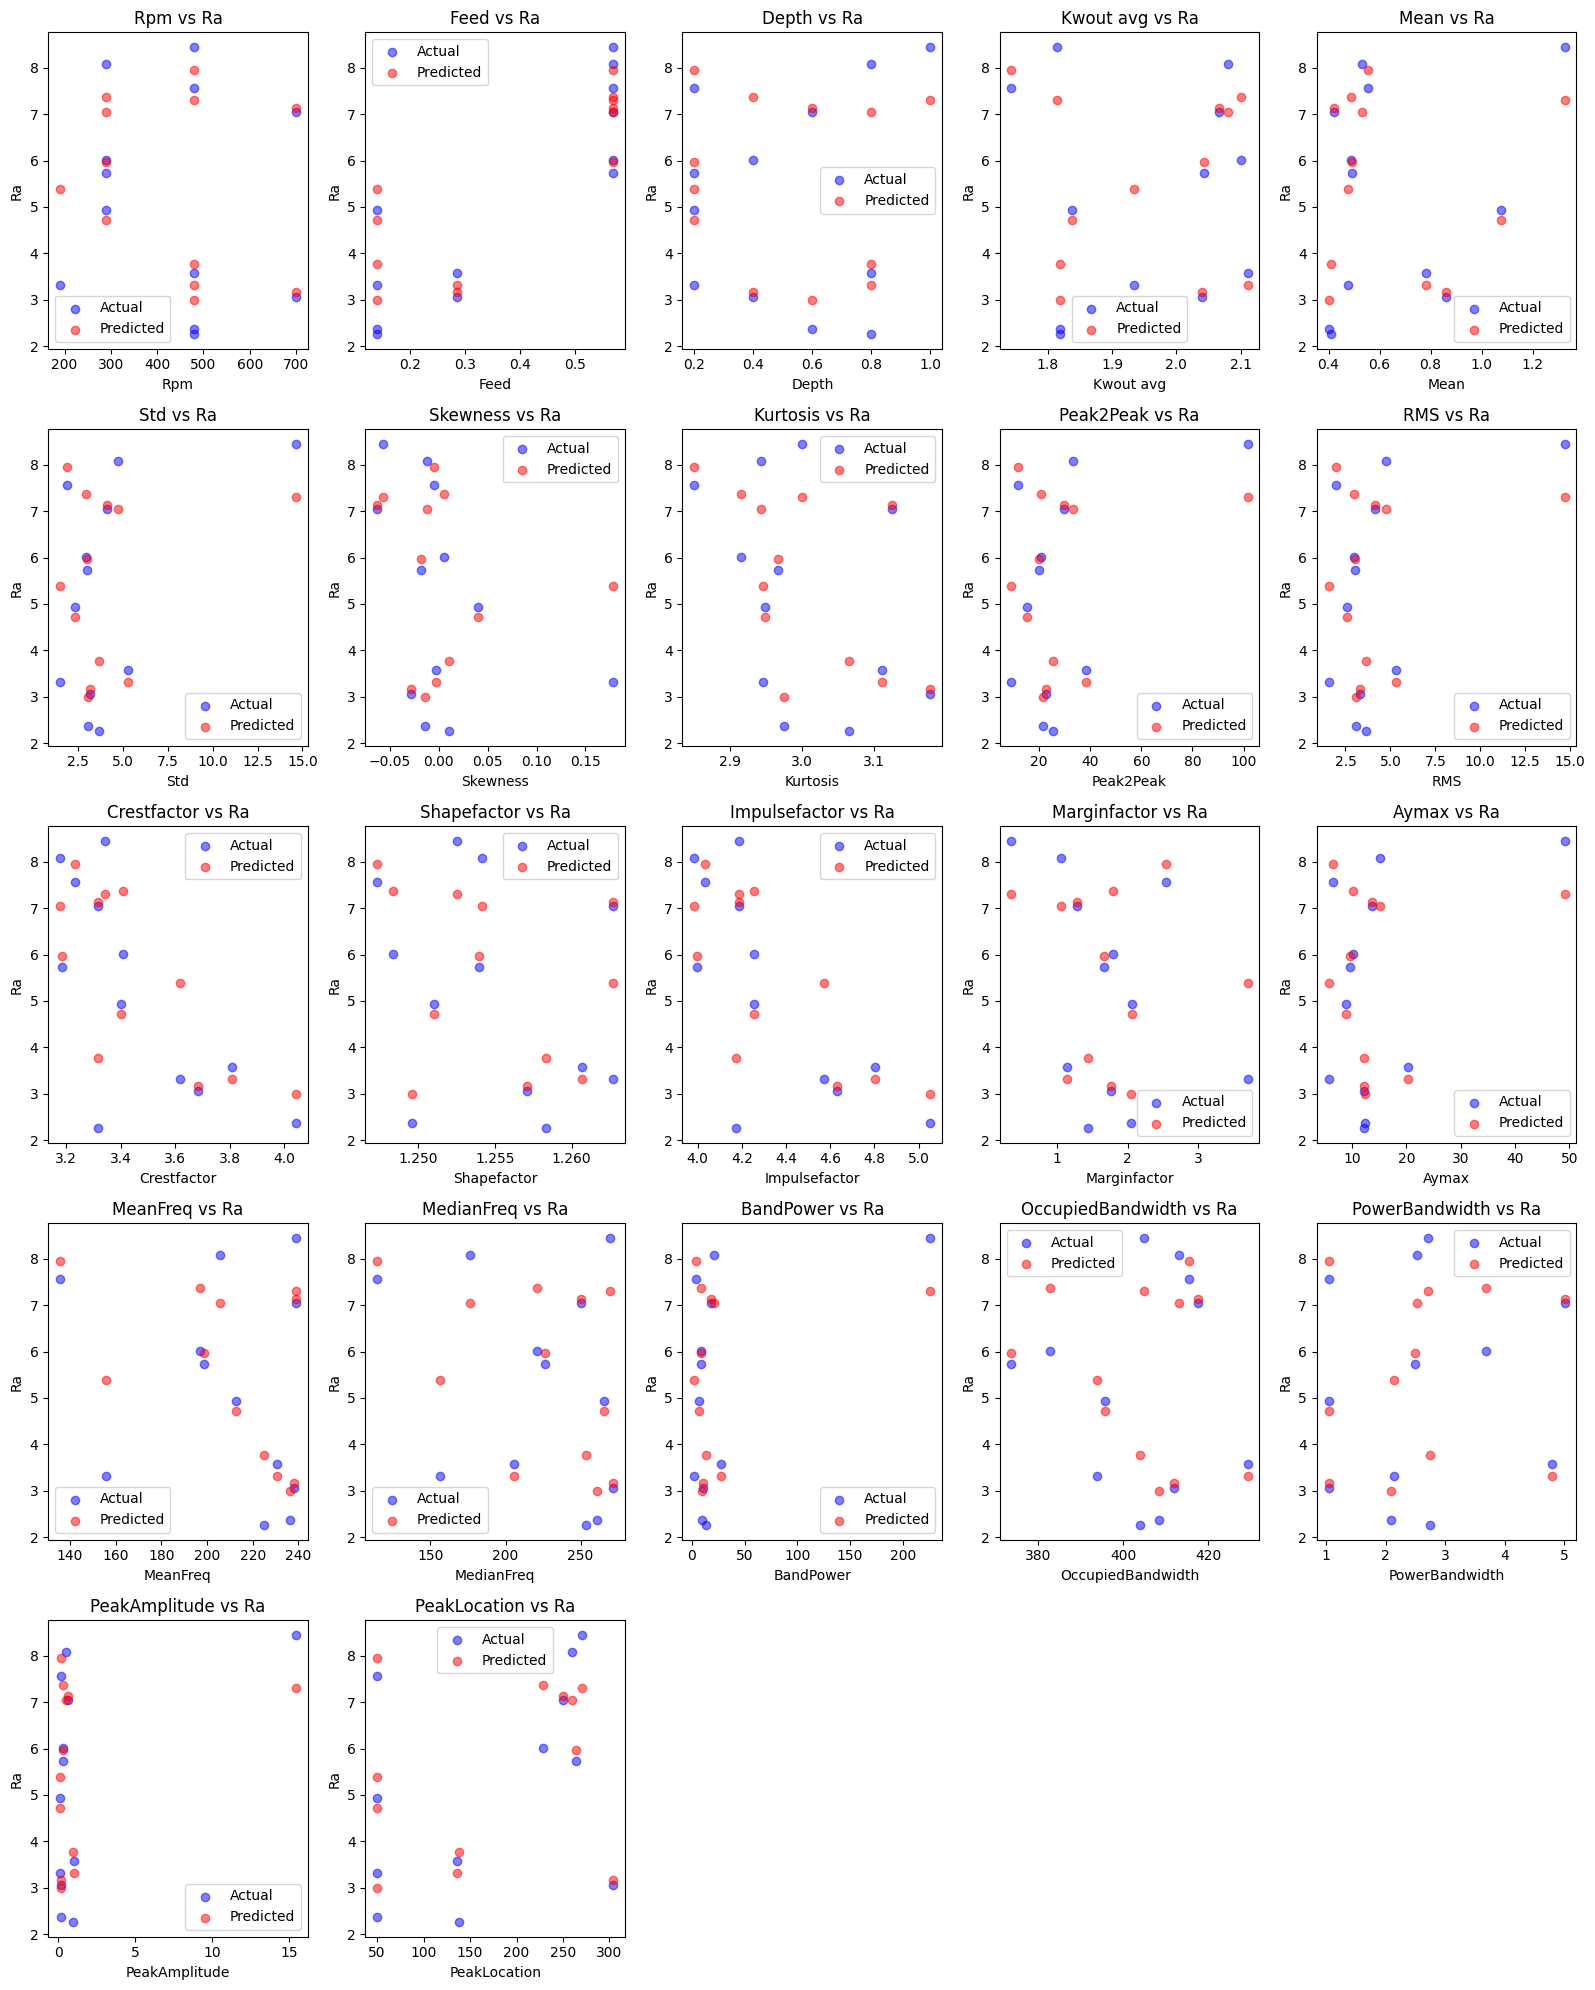

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel('/kaggle/input/iitd-m-tech-smart-lathe-input/IITD M.Tech Smart Lathe Inputs/MLmodel_Input.xlsx')

X = df.iloc[:, 1:23].values  
y = df.iloc[:, 23].values    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#ensembling
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
lr_reg = LinearRegression()

train_predictions = []
test_predictions = []

scaler = StandardScaler()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for model in [rf_reg, gb_reg]:
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_predictions.append(train_pred)
    test_predictions.append(test_pred)

X_train_stacked = np.column_stack(train_predictions)
X_test_stacked = np.column_stack(test_predictions)
X_train_stacked_scaled = scaler.fit_transform(X_train_stacked)
X_test_stacked_scaled = scaler.transform(X_test_stacked)

meta_learner = lr_reg
meta_learner.fit(X_train_stacked_scaled, y_train)

meta_train_pred = meta_learner.predict(X_train_stacked_scaled)
meta_test_pred = meta_learner.predict(X_test_stacked_scaled)

r2 = r2_score(y_test, meta_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, meta_test_pred))
print(f'R² value: {r2}')
print(f'RMSE: {rmse}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, meta_test_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Ra')
plt.ylabel('Predicted Ra')
plt.title('Actual vs Predicted Ra (Ensemble)')
plt.grid(True)
plt.show()

residuals = y_test - meta_test_pred
plt.figure(figsize=(10, 6))
plt.scatter(meta_test_pred, residuals, color='green', alpha=0.5)
plt.xlabel('Predicted Ra')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.axhline(0, color='r', linestyle='--')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()

feature_names = df.columns[1:23]
importances = rf_reg.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importances, color='orange')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance (Random Forest) (all inputs)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


plt.figure(figsize=(16, 20))
for i, feature in enumerate(feature_names):
    plt.subplot(5, 5, i+1)
    plt.scatter(X_test[:, i], y_test, color='blue', label='Actual', alpha=0.5)
    plt.scatter(X_test[:, i], meta_test_pred, color='red', label='Predicted', alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Ra')
    plt.title(f'{feature} vs Ra')
    plt.legend()
plt.tight_layout()
plt.show()


# **Random Forest (all Inputs)**

R² value: 0.7817783619375902
RMSE: 1.0107491342522474


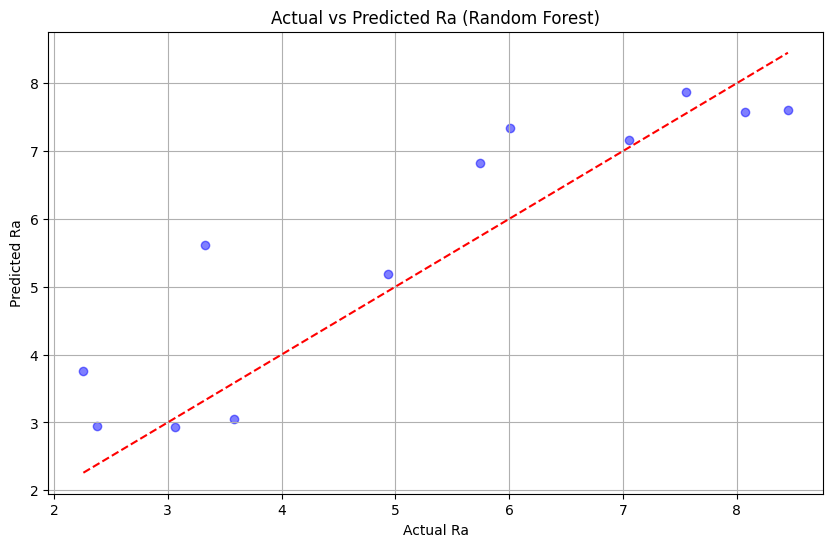

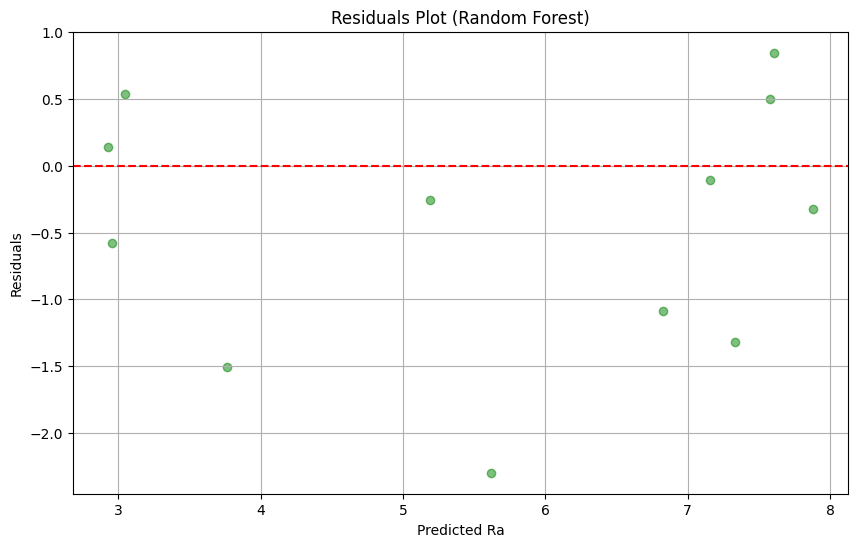

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


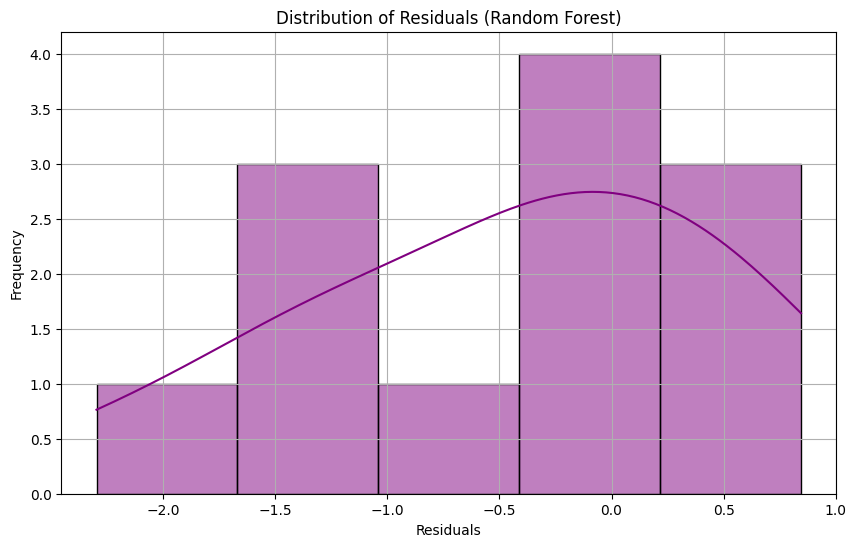

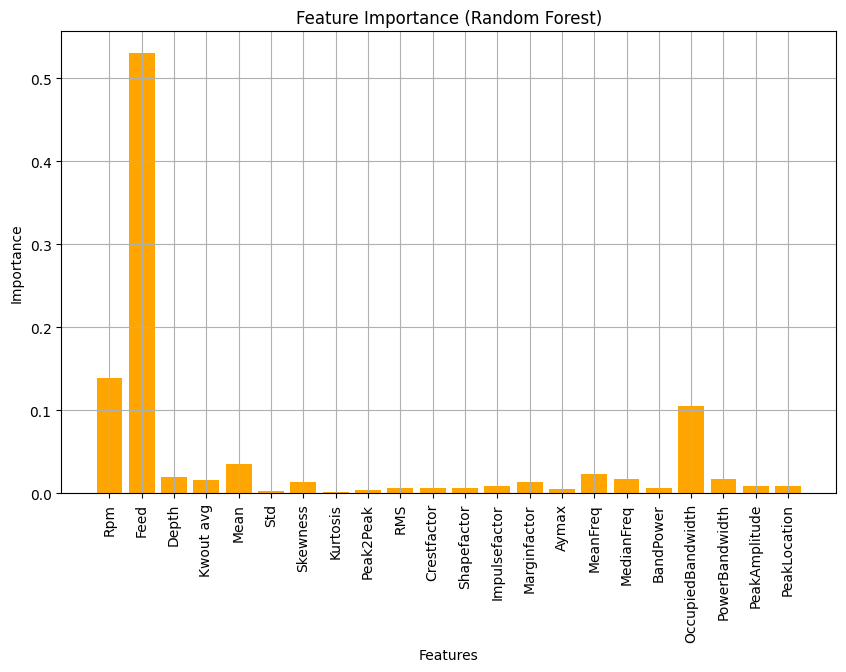

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('/kaggle/input/iitd-m-tech-smart-lathe-input/IITD M.Tech Smart Lathe Inputs/MLmodel_Input.xlsx')

X = df.iloc[:, 1:23].values  
y = df.iloc[:, 23].values    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'R² value: {r2}')
print(f'RMSE: {rmse}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Ra')
plt.ylabel('Predicted Ra')
plt.title('Actual vs Predicted Ra (Random Forest)')
plt.grid(True)
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.xlabel('Predicted Ra')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Random Forest)')
plt.axhline(0, color='r', linestyle='--')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Random Forest)')
plt.grid(True)
plt.show()

feature_names = df.columns[1:23]
importances = rf_reg.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importances, color='orange')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


# **CNN (all Inputs)**

Epoch 1/800


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - loss: 35.1823 - val_loss: 28.7107
Epoch 2/800
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 28.8500 - val_loss: 23.9801
Epoch 3/800
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 23.6462 - val_loss: 19.8930
Epoch 4/800
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 18.2757 - val_loss: 16.2772
Epoch 5/800
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 14.4423 - val_loss: 13.1641
Epoch 6/800
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12.2785 - val_loss: 10.5753
Epoch 7/800
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 10.7504 - val_loss: 8.5351
Epoch 8/800
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 9.0736 - val_loss: 7.0601
Epoch 9/800
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.3099 - val_loss: 6.1129
Epoch 10/800
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.0611 - val_loss: 5.6263
Epoch 11/800
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.8258 - val_loss: 5.3879
Epoch 12/800
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 8.5473 - val_

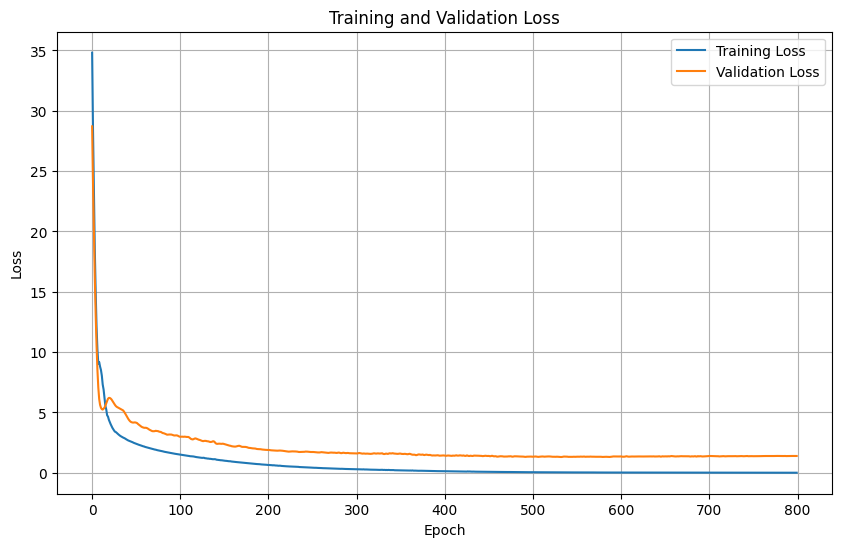

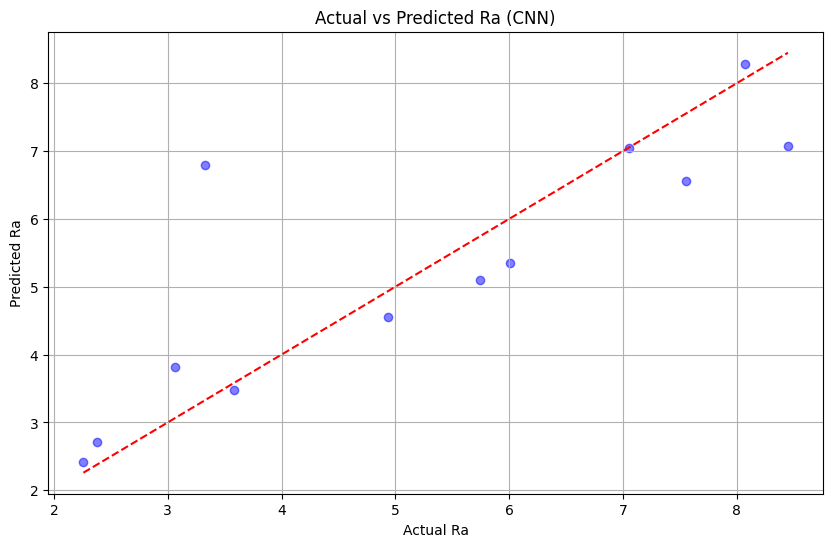

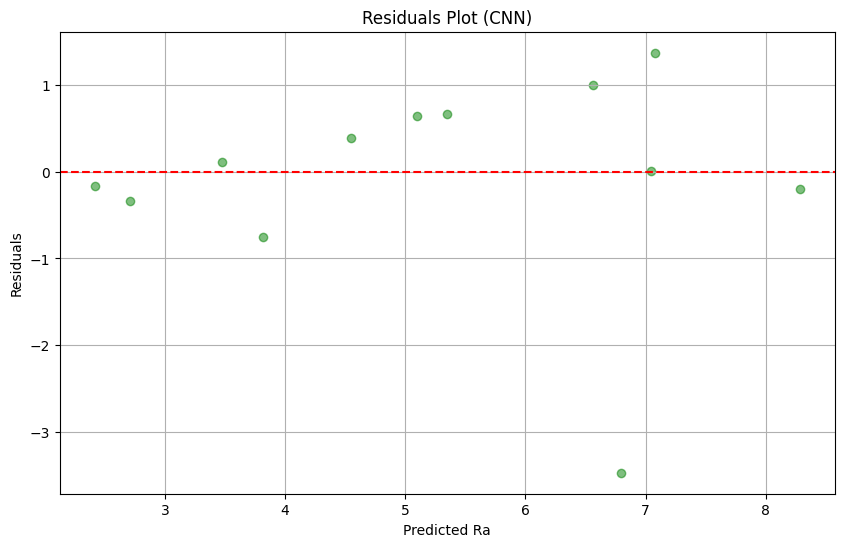

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


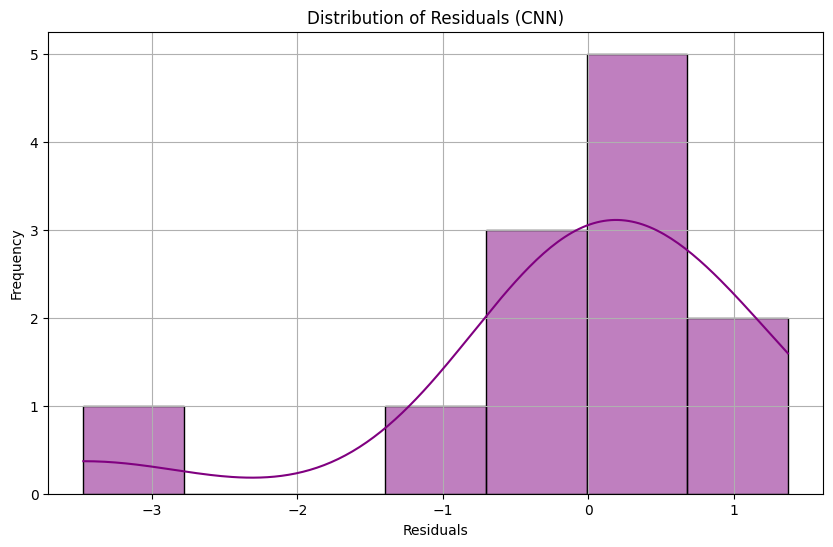

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('/kaggle/input/iitd-m-tech-smart-lathe-input/IITD M.Tech Smart Lathe Inputs/MLmodel_Input.xlsx')
X = df.iloc[:, 1:23].values  
y = df.iloc[:, 23].values   

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train_cnn, y_train, epochs=800, validation_data=(X_test_cnn, y_test), verbose=1)
y_pred = model.predict(X_test_cnn).flatten()

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'R² value: {r2}')
print(f'RMSE: {rmse}')

# training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Ra')
plt.ylabel('Predicted Ra')
plt.title('Actual vs Predicted Ra (CNN)')
plt.grid(True)
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.xlabel('Predicted Ra')
plt.ylabel('Residuals')
plt.title('Residuals Plot (CNN)')
plt.axhline(0, color='r', linestyle='--')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (CNN)')
plt.grid(True)
plt.show()


# **ANN (all inputs)**

Epoch 1/300


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - loss: 34.8728 - val_loss: 29.0719
Epoch 2/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 31.0300 - val_loss: 27.6119
Epoch 3/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 29.8423 - val_loss: 26.1835
Epoch 4/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 26.5676 - val_loss: 24.7777
Epoch 5/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 25.3357 - val_loss: 23.4122
Epoch 6/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 24.4298 - val_loss: 22.0986
Epoch 7/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 22.0034 - val_loss: 20.8431
Epoch 8/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 21.1659 - val_loss: 19.6113
Epoch 9/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 19.3924 - val_loss: 18.4238
Epoch 10/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 18.2627 - val_loss: 17.2900
Epoch 11/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 17.9290 - val_loss: 16.1923
Epoch 12/300
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 15.9

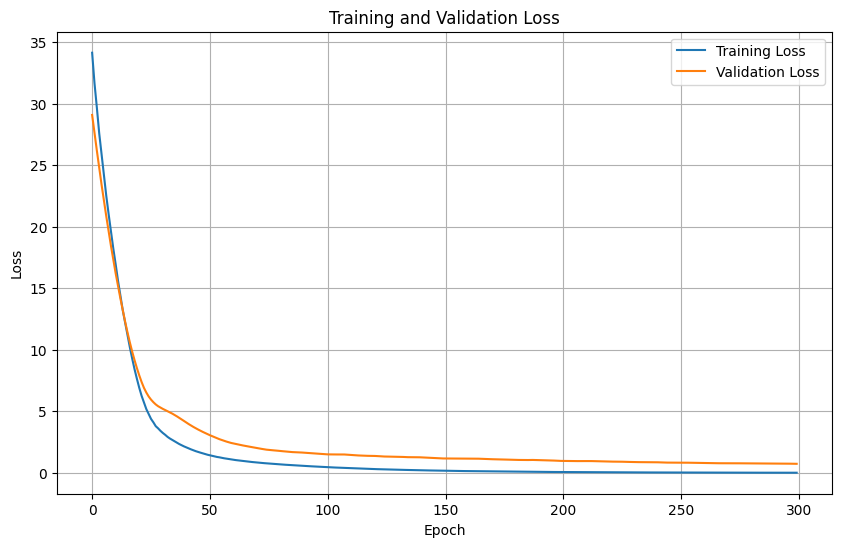

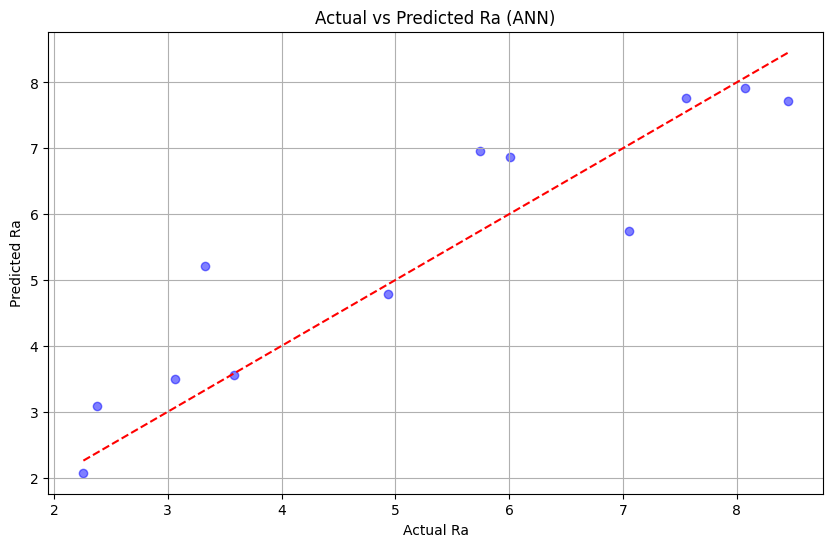

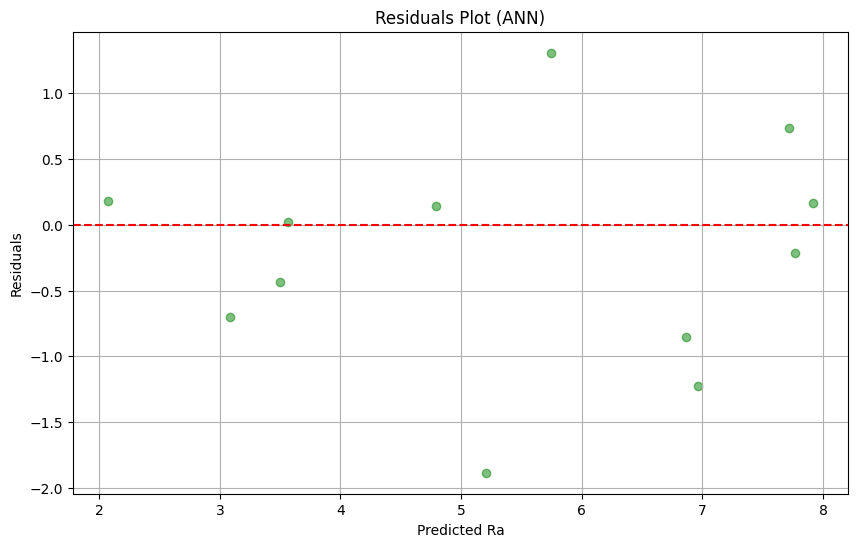

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


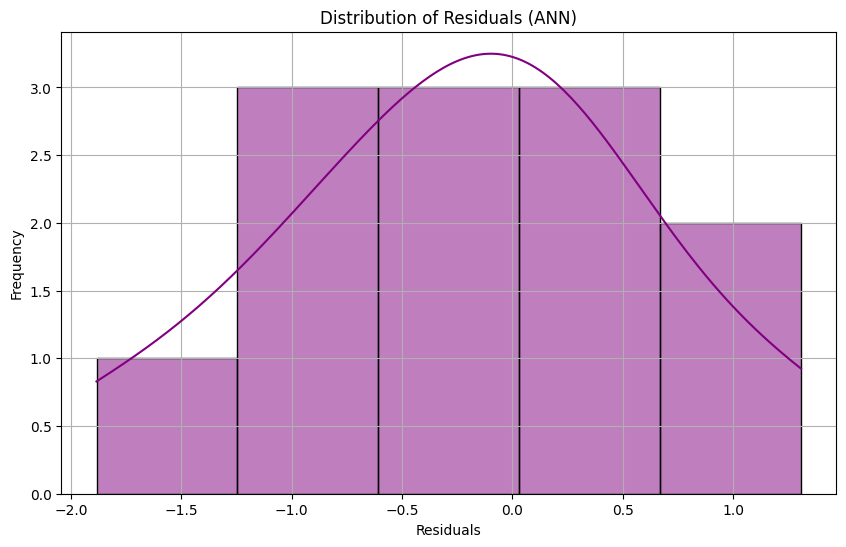

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('/kaggle/input/iitd-m-tech-smart-lathe-input/IITD M.Tech Smart Lathe Inputs/MLmodel_Input.xlsx')


X = df.iloc[:, 1:23].values  
y = df.iloc[:, 23].values    

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), verbose=1)
y_pred = model.predict(X_test).flatten()

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'R² value: {r2}')
print(f'RMSE: {rmse}')

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Ra')
plt.ylabel('Predicted Ra')
plt.title('Actual vs Predicted Ra (ANN)')
plt.grid(True)
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.xlabel('Predicted Ra')
plt.ylabel('Residuals')
plt.title('Residuals Plot (ANN)')
plt.axhline(0, color='r', linestyle='--')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (ANN)')
plt.grid(True)
plt.show()


# **SVM (all Inputs)**

R² value: 0.46506426909722587
RMSE: 1.5825056746807078


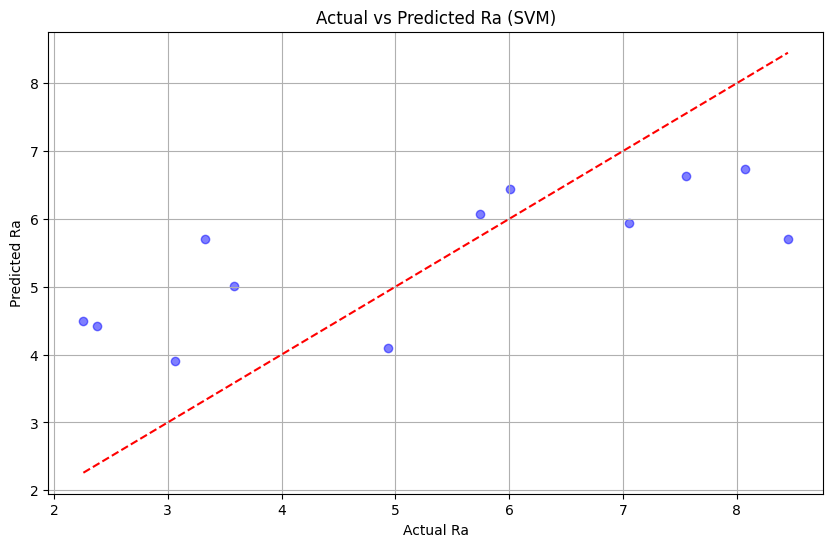

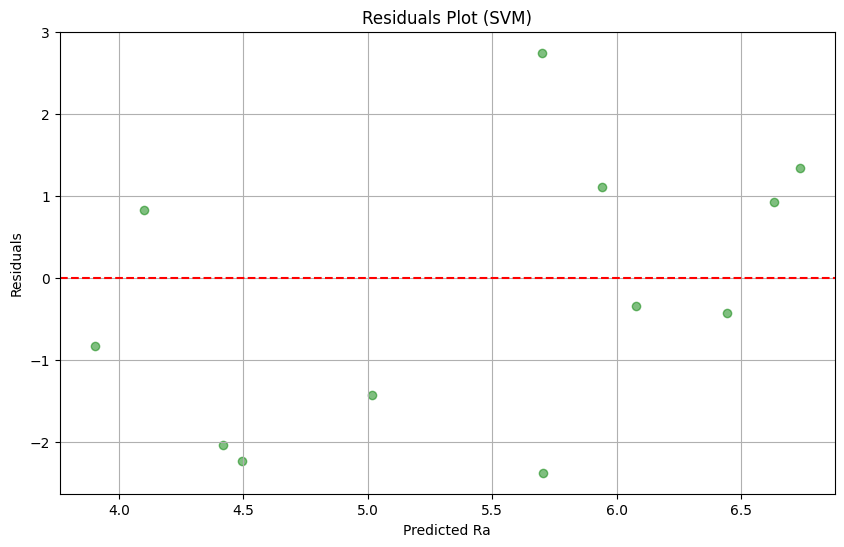

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


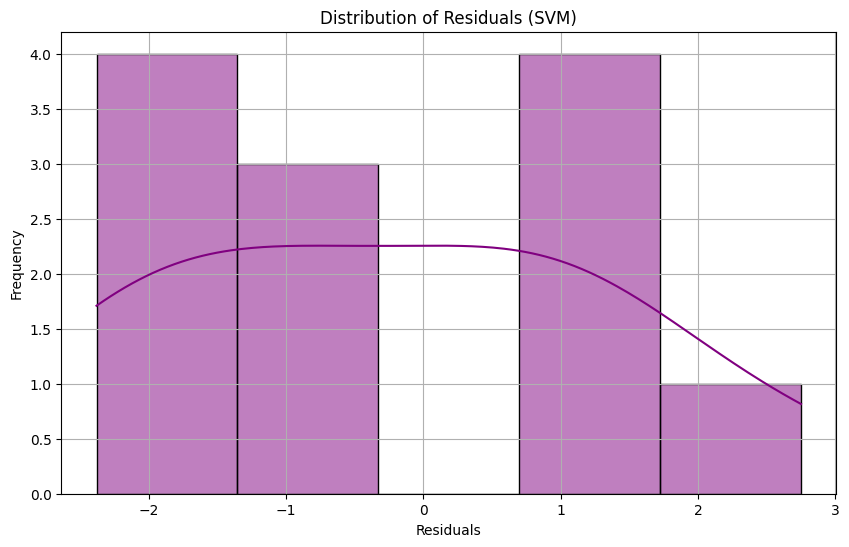

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('/kaggle/input/iitd-m-tech-smart-lathe-input/IITD M.Tech Smart Lathe Inputs/MLmodel_Input.xlsx')

X = df.iloc[:, 1:23].values  
y = df.iloc[:, 23].values  

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_reg = SVR(kernel='rbf')
svm_reg.fit(X_train, y_train)

y_pred = svm_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'R² value: {r2}')
print(f'RMSE: {rmse}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Ra')
plt.ylabel('Predicted Ra')
plt.title('Actual vs Predicted Ra (SVM)')
plt.grid(True)
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.xlabel('Predicted Ra')
plt.ylabel('Residuals')
plt.title('Residuals Plot (SVM)')
plt.axhline(0, color='r', linestyle='--')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (SVM)')
plt.grid(True)
plt.show()


# **Linear Regression (all Inputs)**

Coefficients:
Feature 1: -0.051856558880891336
Feature 2: 2.1704047239518234
Intercept: 5.473041666666668
Regression Equation:
Ra = 5.53 + (-1.01) * X1 + (1.64) * X2 + (0.49) * X3 + (-0.08) * X4 + (-0.46) * X5 + (0.41) * X6 + (0.00) * X7 + (-0.01) * X8 + (-0.34) * X9 + (0.41) * X10 + (-0.39) * X11 + (-0.04) * X12 + (0.15) * X13 + (0.05) * X14 + (0.02) * X15 + (-0.18) * X16 + (0.01) * X17 + (-0.53) * X18 + (0.17) * X19 + (0.02) * X20 + (0.15) * X21 + (0.09) * X22
R² value: 0.619534902243718
RMSE: 1.357922019156517


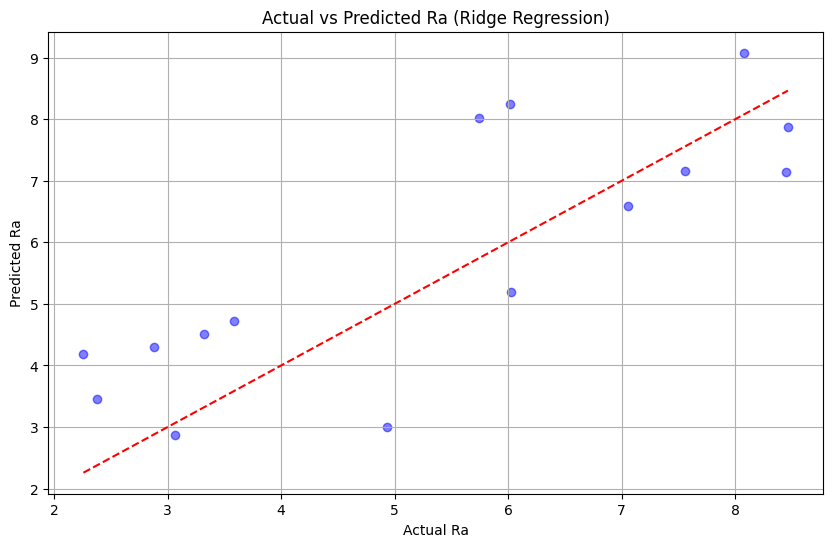

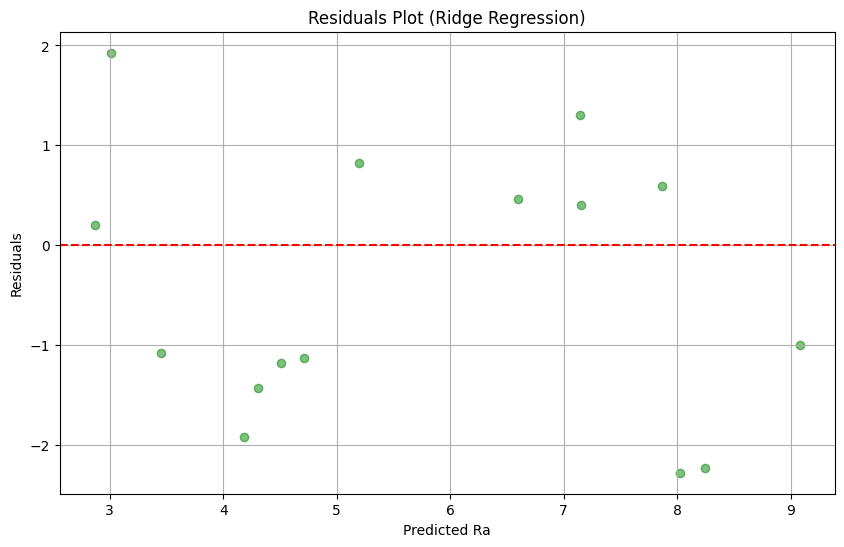

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


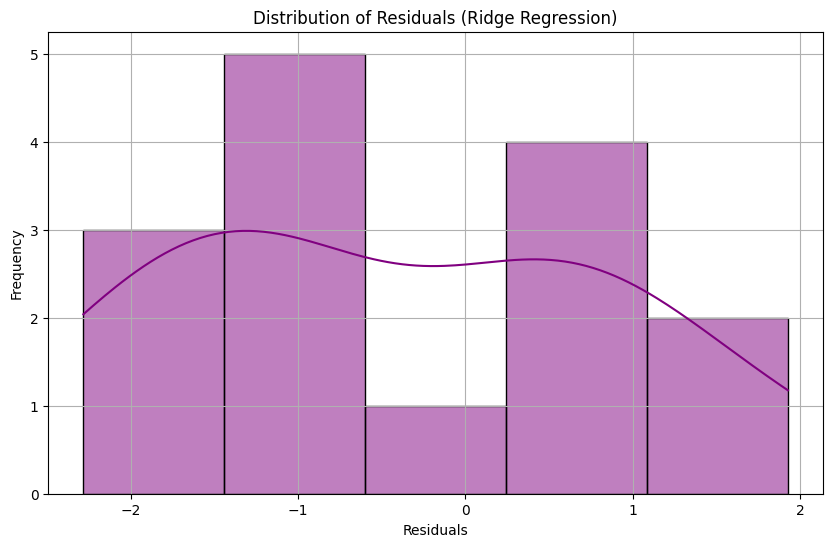

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel('/kaggle/input/iitd-m-tech-smart-lathe-input/IITD M.Tech Smart Lathe Inputs/MLmodel_Input.xlsx')

X = df.iloc[:, 1:23].values 
y = df.iloc[:, 23].values    

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ridge_reg = Ridge(alpha=1.0)  
ridge_reg.fit(X_train, y_train)

coefficients = ridge_reg.coef_
intercept = ridge_reg.intercept_

print("Coefficients:")
for i, coef in enumerate(lr_reg.coef_):
    print(f"Feature {i+1}: {coef}")
print(f"Intercept: {lr_reg.intercept_}")

print("Regression Equation:")
equation = f"Ra = {intercept:.2f}"
for i, coef in enumerate(coefficients):
    equation += f" + ({coef:.2f}) * X{i+1}"
print(equation)

y_pred = ridge_reg.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'R² value: {r2}')
print(f'RMSE: {rmse}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Ra')
plt.ylabel('Predicted Ra')
plt.title('Actual vs Predicted Ra (Ridge Regression)')
plt.grid(True)
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.xlabel('Predicted Ra')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Ridge Regression)')
plt.axhline(0, color='r', linestyle='--')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Ridge Regression)')
plt.grid(True)
plt.show()


# **XGBoost (All Inputs)**

R² value: 0.8215920923276828
RMSE: 0.9139059867110386


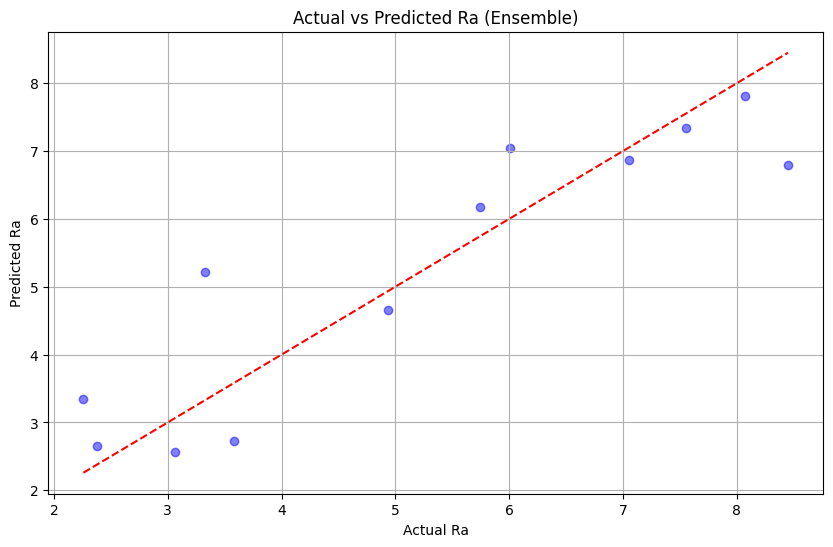

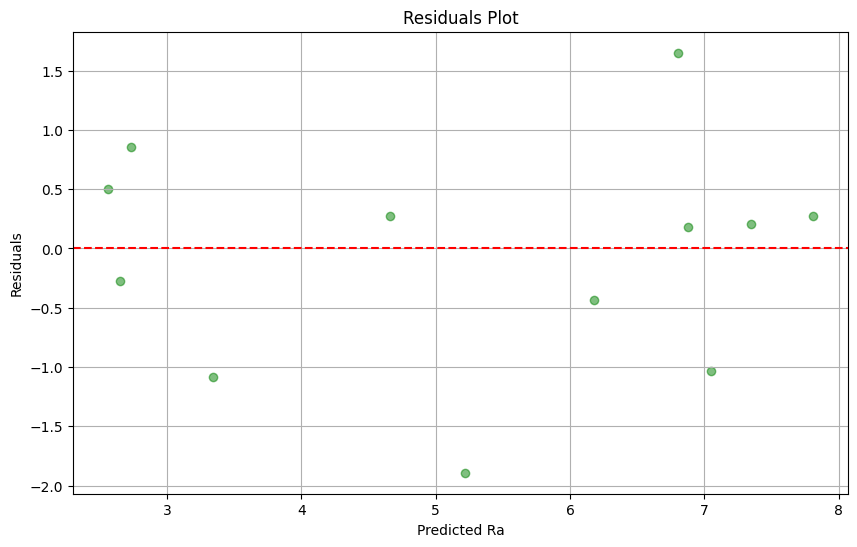

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


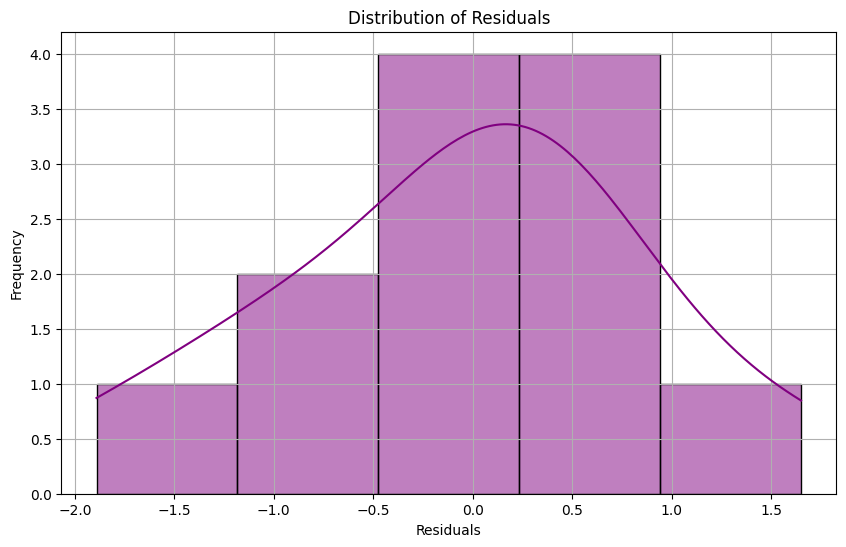

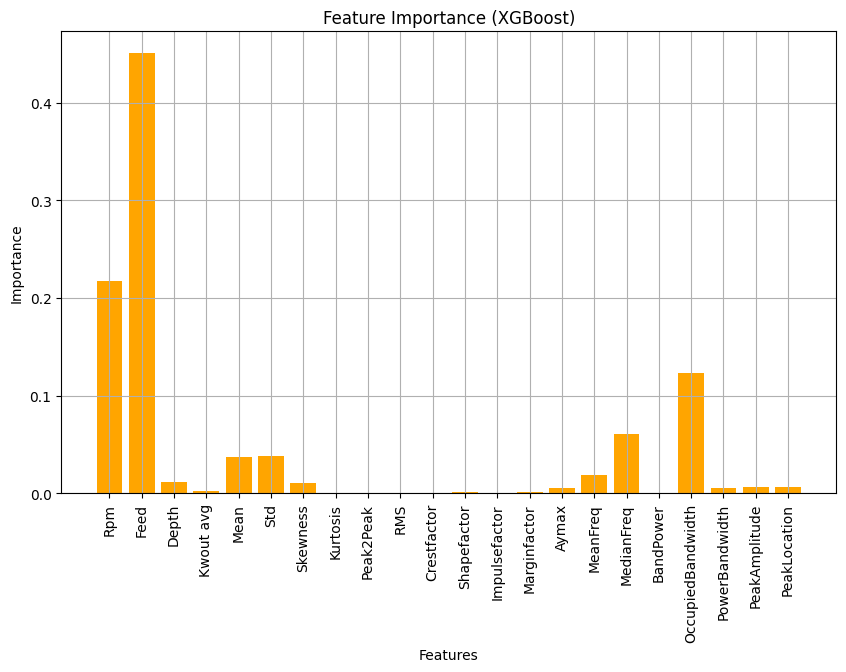

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor

df = pd.read_excel('/kaggle/input/iitd-m-tech-smart-lathe-input/IITD M.Tech Smart Lathe Inputs/MLmodel_Input.xlsx')
X = df.iloc[:, 1:23].values 
y = df.iloc[:, 23].values   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_reg1 = XGBRegressor(n_estimators=100, random_state=42)
xgb_reg2 = XGBRegressor(n_estimators=100, random_state=42)
lr_reg = LinearRegression()

train_predictions = []
test_predictions = []
scaler = StandardScaler()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for model in [xgb_reg1, xgb_reg2]:
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_predictions.append(train_pred)
    test_predictions.append(test_pred)

X_train_stacked = np.column_stack(train_predictions)
X_test_stacked = np.column_stack(test_predictions)
X_train_stacked_scaled = scaler.fit_transform(X_train_stacked)
X_test_stacked_scaled = scaler.transform(X_test_stacked)

meta_learner = lr_reg
meta_learner.fit(X_train_stacked_scaled, y_train)

meta_train_pred = meta_learner.predict(X_train_stacked_scaled)
meta_test_pred = meta_learner.predict(X_test_stacked_scaled)

r2 = r2_score(y_test, meta_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, meta_test_pred))
print(f'R² value: {r2}')
print(f'RMSE: {rmse}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, meta_test_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Ra')
plt.ylabel('Predicted Ra')
plt.title('Actual vs Predicted Ra (Ensemble)')
plt.grid(True)
plt.show()

residuals = y_test - meta_test_pred
plt.figure(figsize=(10, 6))
plt.scatter(meta_test_pred, residuals, color='green', alpha=0.5)
plt.xlabel('Predicted Ra')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.axhline(0, color='r', linestyle='--')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()

feature_names = df.columns[1:23]
importances = xgb_reg1.feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importances, color='orange')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance (XGBoost)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

plt.figure(figsize=(16, 20))
for i, feature in enumerate(feature_names):
    plt.subplot(5, 5, i+1)
    plt.scatter(X_test[:, i], y_test, color='blue', label='Actual', alpha=0.5)
    plt.scatter(X_test[:, i], meta_test_pred, color='red', label='Predicted', alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Ra')
    plt.title(f'{feature} vs Ra')
    plt.legend()
plt.tight_layout()
plt.show()